# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# to make Python code follow good coding structure and practices
!pip install nb_black
%load_ext nb_black

# importing libraries for handling data
import numpy as np
import pandas as pd

# importing libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# machine learning libraries to split train & test data, and build linear regression model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.6 MB/s eta 0:00:00
  Created wheel for nb_black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=2c1cf97e50d6f7d0597638a3c73943fbfd1f30929c96eff84b2a94900c2fd71d
  Stored in directory: /root/.cache/pip/wheels/a6/5e/1e/a15614d6ea220d070043db3b650d73a8b4938aefd520496c11
Successfully built nb_black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.

<IPython.core.display.Javascript object>

## Loading the dataset

In [ ]:
# mounting google drive for use
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


<IPython.core.display.Javascript object>

In [ ]:
# getting data from csv file, making a copy for active use & manipulation
data = pd.read_csv("/content/drive/My Drive/DSBA Notebooks/U3/Project 3/used_device_data.csv")
df = data.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

<IPython.core.display.Javascript object>

In [ ]:
df.tail()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3449       Asus  Android        15.34  yes  no             NaN   
3450       Asus  Android        15.24  yes  no            13.0   
3451    Alcatel  Android        15.80  yes  no            13.0   
3452    Alcatel  Android        15.80  yes  no            13.0   
3453    Alcatel  Android        12.83  yes  no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
3449        232               4.492337              6.483872  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994

<IPython.core.display.Javascript object>

Dataset loaded correctly. I do notice that normalized_used_price is not at the end of the columns, so may have to adjust if iterating for visualization in univariate or bivariate analyses.

In [ ]:
df.shape

(3454, 15)

<IPython.core.display.Javascript object>

3454 rows, 15 columns. Therefore, there should be 14 predictor variables and one dependent variable, the normalized_used_price.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

* Immediately notice that main_camera_mp, selfie_camera_mp, int_memory, ram, 
battery, and weight have null entries (less than 3454 entries). Indicates holes in the data.
* Only object types are brand_name, os, 4g, and 5g, understandably.
* 4g and 5g will need dummy variables, given that they can be converted to binary values for "yes" and "no".

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

Missing values in columns "main_camera_mp", "selfie_camera_mp", "int_memory", "ram", "battery", and "weight". Will examine distributions and treat later.

In [ ]:
df.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3275.0     9.460208     4.815461     0.080000   
selfie_camera_mp       3452.0     6.554229     6.970372     0.000000   
int_memory             3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

<IPython.core.display.Javascript object>

This will change, once missing values are imputed. I notice some outlandish "max" values, so I will check to see if they all relate to each other (e.g. a specialized device that is extra heavy due to a larger battery, larger ram, larger screen, etc)

In [ ]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

Thankfully, no duplicated entries.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

###Univariate Analysis

In [ ]:
cat_cols = ['brand_name', 'os', '4g', '5g', 'release_year']
for col in cat_cols:
  print(df[col].value_counts())
  print("Unique vals: ", df[col].nunique())
  print('-'*50)

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64
Unique vals:  34
--------------------------------------------------
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64
Unique vals:  4
--------------------------------------------------
yes    2335
no     1119
Name: 4g, dtype: int64
Unique vals:  2
--------------------------------------------------
no     3302
yes     1

<IPython.core.display.Javascript object>

* Dummy variables will be created for the above variables: brand_name, OS, 4g, 5g, release_year
* 33 named brands, with a 34th category for "Others", with a large proportion belonging to "Others" category.
* 4 OSes named
* 4g and 5g have either "yes" or "no" options
* 8 different release years in sample data

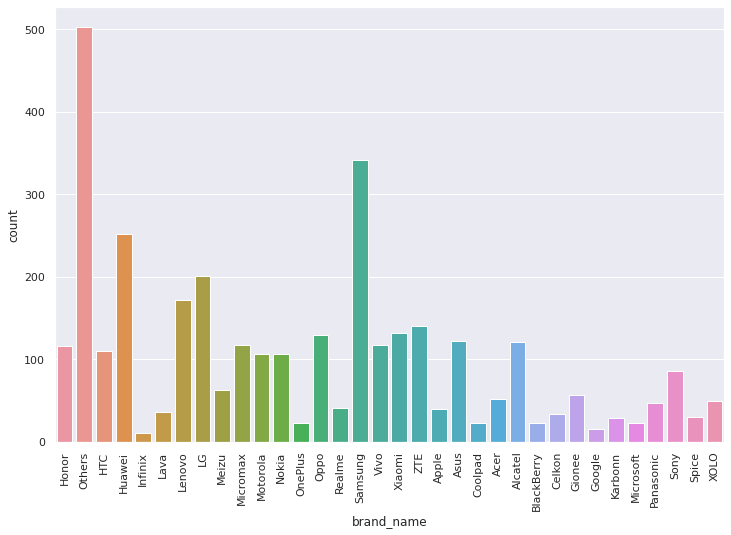

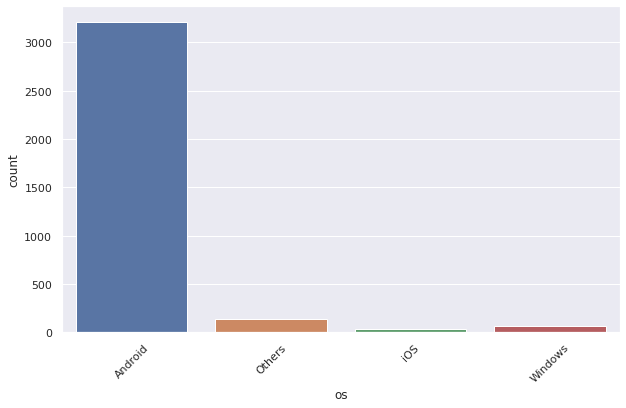

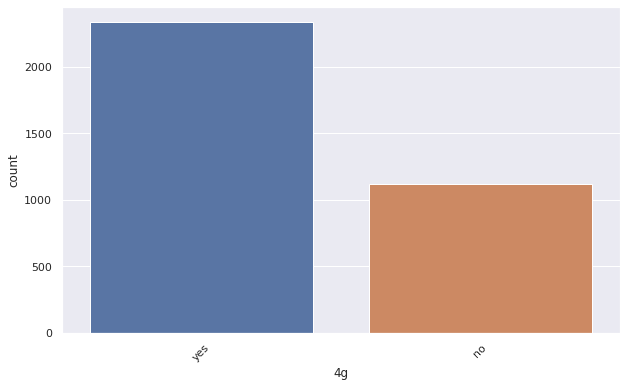

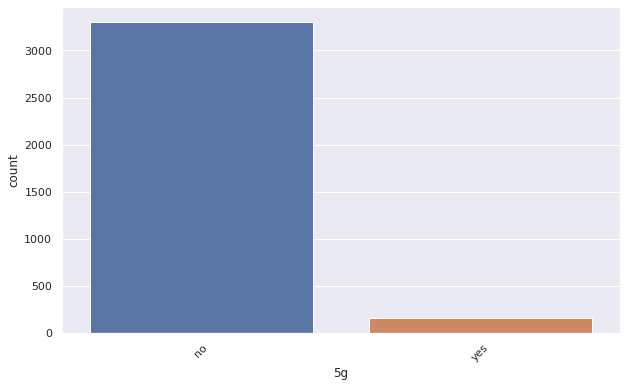

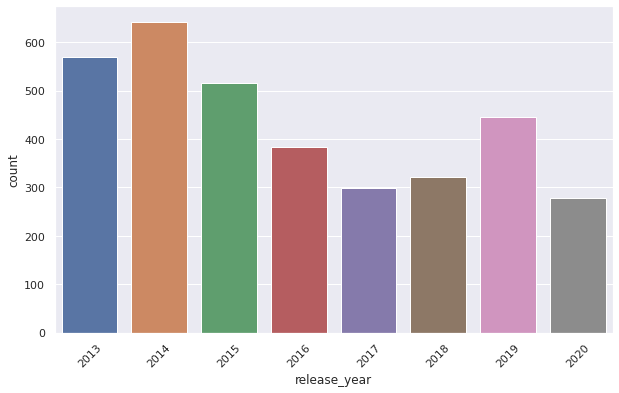

<IPython.core.display.Javascript object>

In [ ]:
for col in cat_cols:
  if (col == 'brand_name'):
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
  else:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
plt.show()

In [ ]:
(df[df['brand_name'] == "Others"].shape[0] / df.shape[0]) * 100

14.53387376954256

<IPython.core.display.Javascript object>

In [ ]:
(df[df['4g'] == "yes"].shape[0] / df.shape[0]) * 100

67.60277938621888

<IPython.core.display.Javascript object>

In [ ]:
(df[df['5g'] == "yes"].shape[0] / df.shape[0]) * 100

4.400694846554718

<IPython.core.display.Javascript object>

In [ ]:
df[df['4g'] == "yes"].shape[0] + df[df['5g'] == "yes"].shape[0]

2487

<IPython.core.display.Javascript object>

In [ ]:
df.loc[(df['4g'] == 'yes') & (df['5g'] == 'no')].shape[0]

2183

<IPython.core.display.Javascript object>

In [ ]:
df.loc[(df['4g'] == 'no') & (df['5g'] == 'yes')].shape[0]

0

<IPython.core.display.Javascript object>

Comments:
* brand_name: "Others" accounts for almost 15% of brand entries. The top named brands are Samsung, Huawei, and LG. The least mentioned are Infinix and Google.
* os: Most entries are Androids, followed by "Others", Windows, and iOS, in that order. Android holds a substantial portion of the market.
* 4g: 68% of the devices in the dataset are capable of 4g.
* 5g: Unlike 4g, only about 4% of the devices in the dataset are capable of 5g.
* 4g and 5g: There are 2487 devices listed which are capable of both 4g and 5g, 2183 devices that are only capable of 4g, and no devices that are only capable of 5g.
* release_year: The highest number of devices is from 2014, followed by 2013 and 2015. I notice a general downward trend of the number of entries from subsequent years, which likely represents the fact that fewer new devices will have been able to be manufactured in comparison to their older counterparts, which have been in production for longer.

<Figure size 720x432 with 0 Axes>

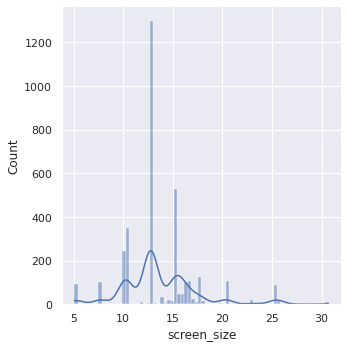

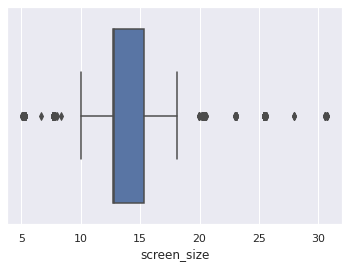

<Figure size 720x432 with 0 Axes>

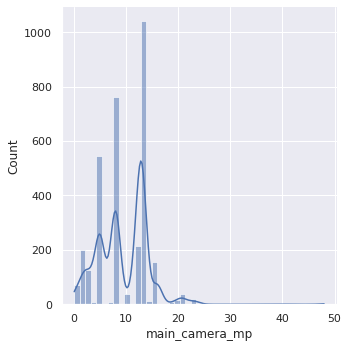

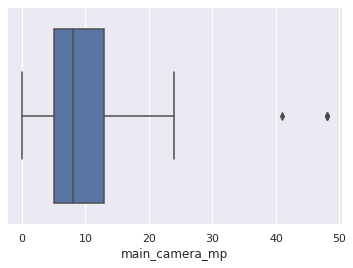

<Figure size 720x432 with 0 Axes>

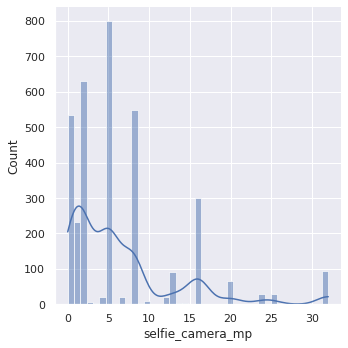

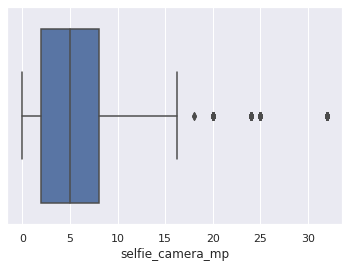

<Figure size 720x432 with 0 Axes>

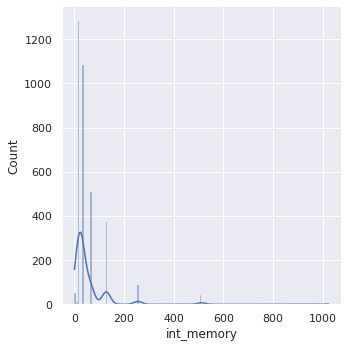

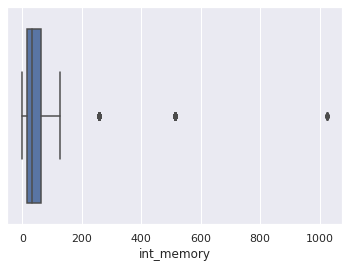

<Figure size 720x432 with 0 Axes>

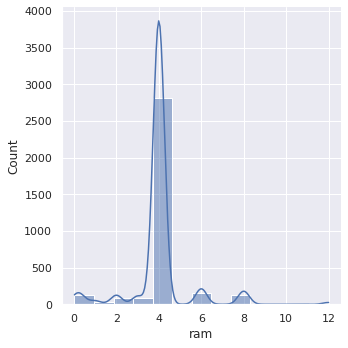

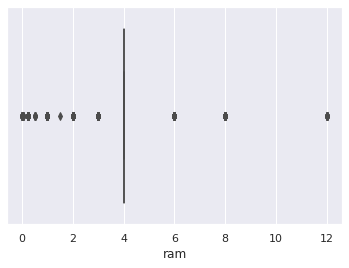

<Figure size 720x432 with 0 Axes>

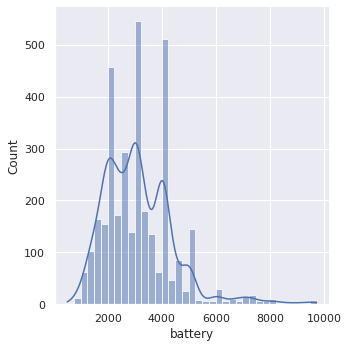

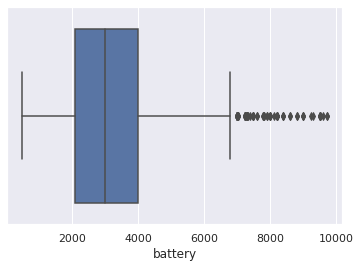

<Figure size 720x432 with 0 Axes>

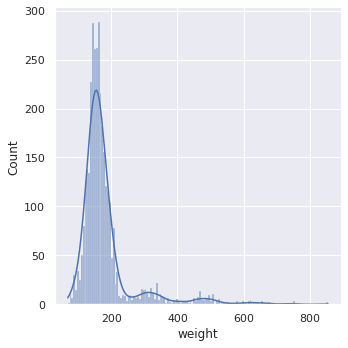

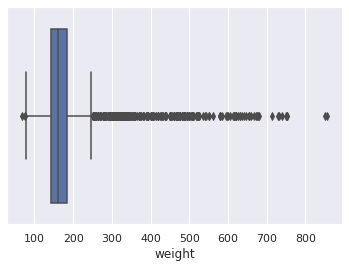

<Figure size 720x432 with 0 Axes>

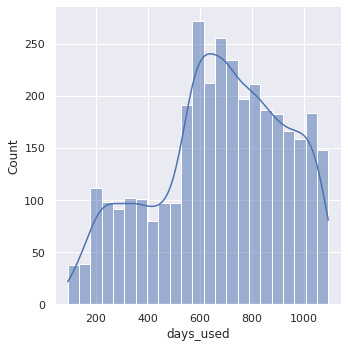

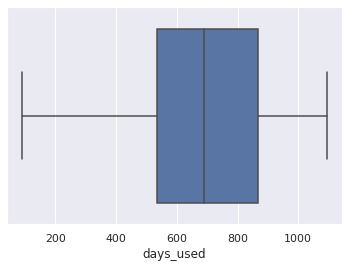

<Figure size 720x432 with 0 Axes>

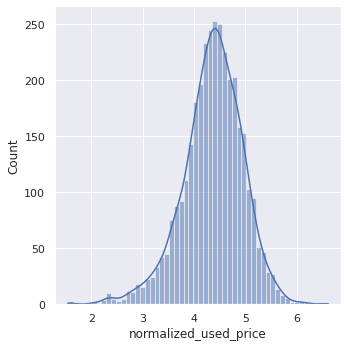

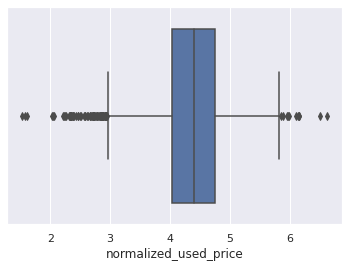

<Figure size 720x432 with 0 Axes>

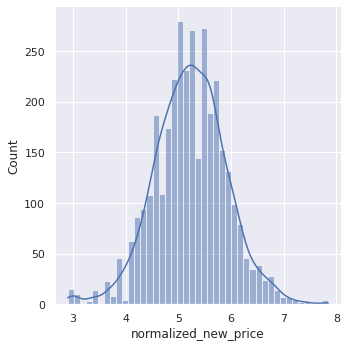

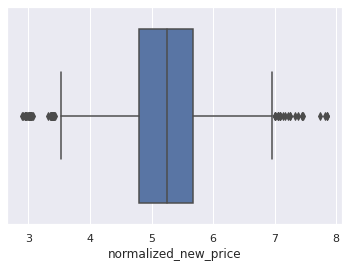

<IPython.core.display.Javascript object>

In [ ]:
num_cols = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price']
for col in num_cols:
  plt.figure(figsize=(10,6))
  sns.displot(data=df, x=col, kde=True)
  plt.show()
  sns.boxplot(data=df, x=col)
  plt.show()

In [ ]:
df['screen_size'].mode()

0    12.7
dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
df['main_camera_mp'].mode()

0    13.0
dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
df[num_cols].describe()

screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3454.000000     3275.000000       3452.000000  3450.000000   
mean     13.713115        9.460208          6.554229    54.573099   
std       3.805280        4.815461          6.970372    84.972371   
min       5.080000        0.080000          0.000000     0.010000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      12.830000        8.000000          5.000000    32.000000   
75%      15.340000       13.000000          8.000000    64.000000   
max      30.710000       48.000000         32.000000  1024.000000   

               ram      battery       weight    days_used  \
count  3450.000000  3448.000000  3447.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   674.869716   
std       1.365105  1299.682844    88.413228   248.580166   
min       0.020000   500.000000    69.000000    91.000000   
25%       4.000000  2100.000000   142.000000   533.500000   
50%       4.000000  3000.000000   160.000000   690.500000   
75%       4.000000  4000.000000   185.000000   868.750000   
max      12.000000  9720.000000   855.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

<IPython.core.display.Javascript object>

* screen_size: Looks pretty normally distributed and has consistent outliers to each side, so I won't worry about treating them. There are a lot of screens at 12.7cm, but the data has a severe max of 30.71cm, likely for a specialized device. 50% of entries lie between 12.7cm and 15.34cm.
* main_camera_mp: Looks right-skewed and does have outliers to the right. This may coincide with the specialized devices I mentioned when looking at screen_size, but I will monitor these just in case. Most devices are at 13.0mp, and 50% of devices are between 5mp and 13mp. They average at 9.38mp.
* selfie_camera_mp: Also looks right-skewed, but perhapes there is a correlation between high specs for both the main and selfie cameras. Average quality here is about 7mp, with 50% of entries ranging from 2mp to 8mp.
* int_memory: Very right-skewed, with only a few severe outliers to the right. Will definitely have to check for treatment later on. Average amount of memory is 55GB, with 50% ranging between 16GB and 64GB. The max value of 1024GB raises serious questions in my min, but with other similarly high values in other columns, it really may just be necessary for a specialized device.
* ram: Looks pretty normal, besides the almost-mirrored bumps on either side. Outliers on the boxplot are pretty consistent, as well. Average ram is 4GB, which is also the most common amount.
* battery: Looks abnormal and a bit right-skewed, but therer are several outliers to the right in the boxplot, so it likely doesn't need treatment. Average capacity of the batteries entered is 3133mAh, with 50% between 2100mAh and 4000mAh. The max entered is 9720mAh, unsurprisingly for a specialized device.
* weight: Right-skewed with a good single curve. There are lots of consistent points beyond Q3 in the boxplot, so I won't investigate for outlier treatment. The average here is 183g, with 50% between 142g and 185g. There are definitely many heavier devices, but this is understandable if some devices need a bigger battery/screen/etc.
* days_used: Curve here looks a bit abnormal, with more devices being used for more days. The average is about 675 days, which sounds like the ever-popular 2-year trade-in contract to me. 50% of entries lies between 533 and 869 days, and the average is well in between Q1 and Q3, with no outliers on the boxplot, so no need for outlier detection or treatment.
* normalized_used_price: Looks pretty normal, as variable name would suggest. Some outliers to either side, but not much of a concern for outlier treatment. Average (normalized) price is 4.36 Euros, with 50% lying between 4.03 and 4.76 Euros.
* normalized_new_price: Similar distribution to the used prices, with an average of 5.23 Euros and 50% betweeen 4.79 and 5.67 Euros. It makes sense that these values would be a bit higher than the used prices, due to wear and tear on devices during use.

###Bivariate Analysis

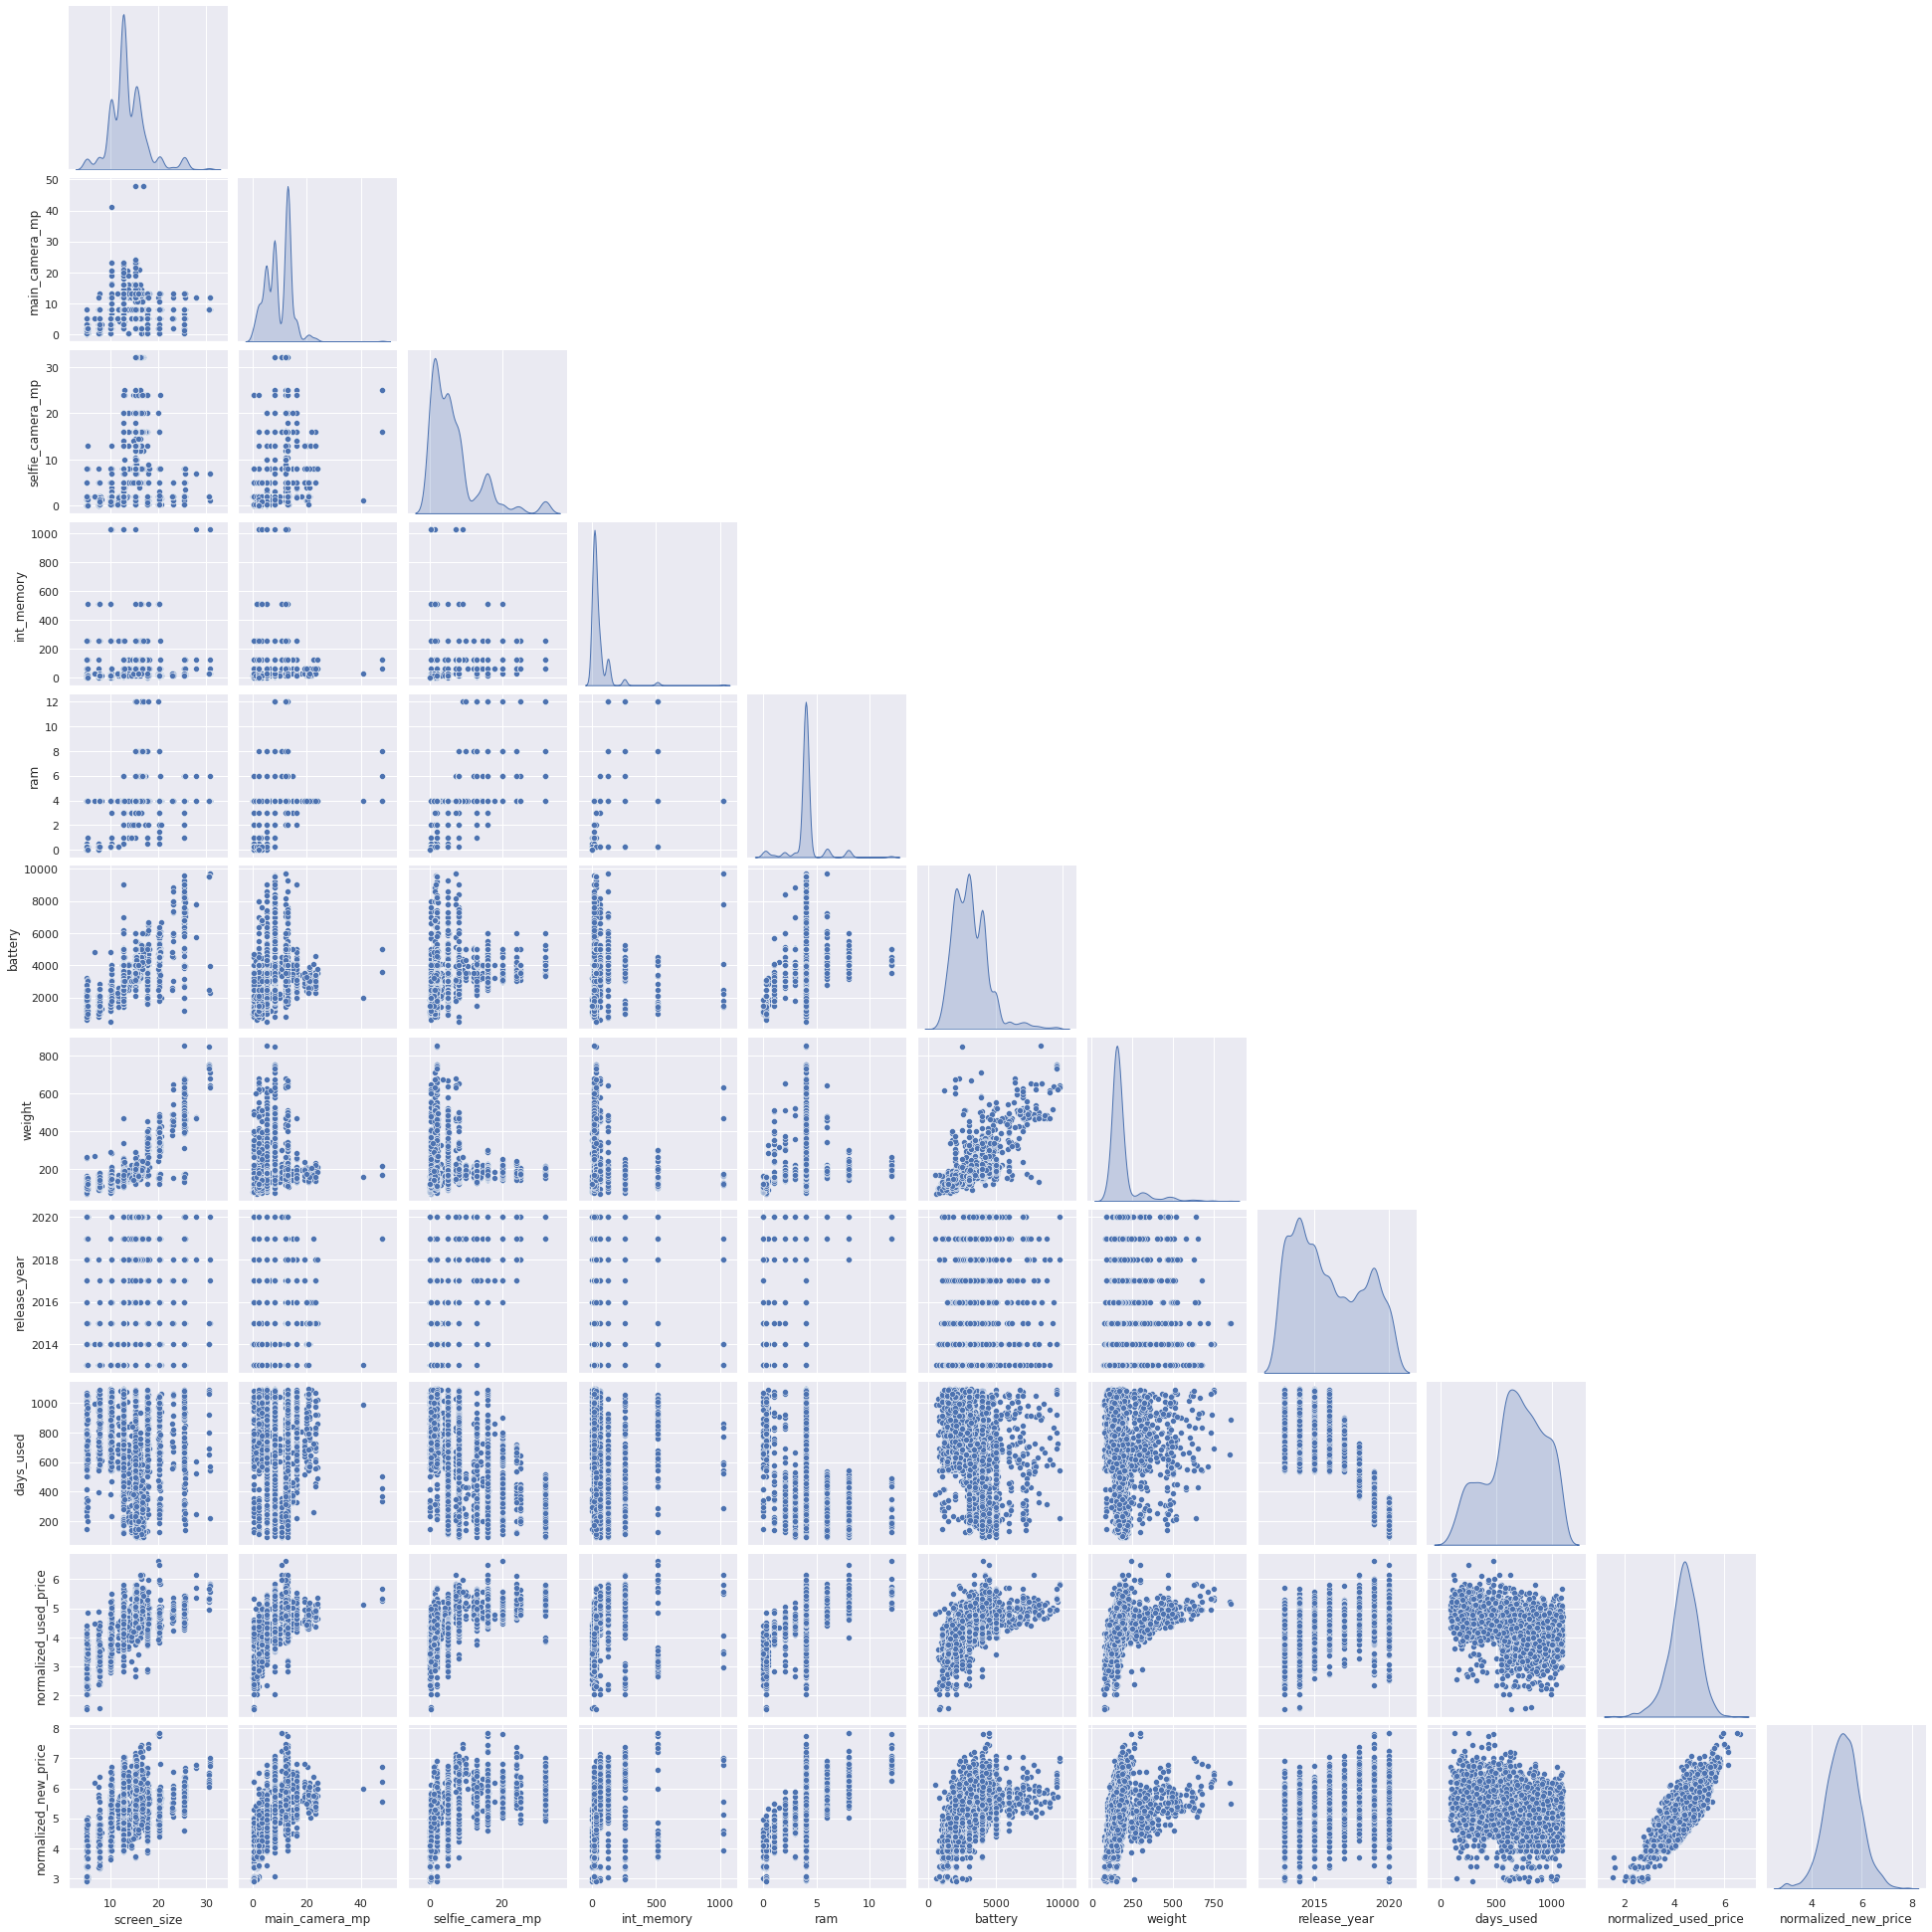

<IPython.core.display.Javascript object>

In [ ]:
sns.pairplot(data=df, diag_kind='kde', corner=True);

Plots don't currently show linear relationships, but there are definitely some slight correlations among the variables. I wonder if this has to do with any multicollinearity present in the dataset.

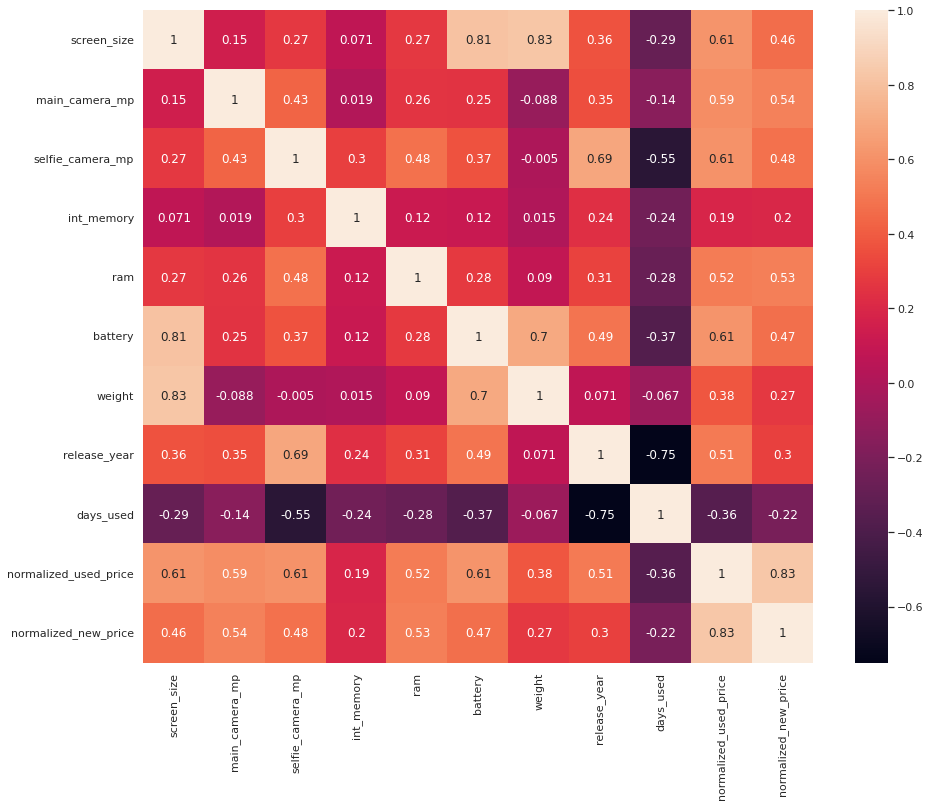

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Highest correlations are between:
* screen_size and battery - 0.81
* screen_size and weight - 0.83
* battery and weight - 0.7
* release_year and days_used - -0.75
* normalized_used_price and normalized_new_price = 0.83

Highest correlations with normalized_used_price are:
* normalized_new_price - 0.83
* battery - 0.61
* selfie_camera_mp - 0.61
* screen_size = 0.61

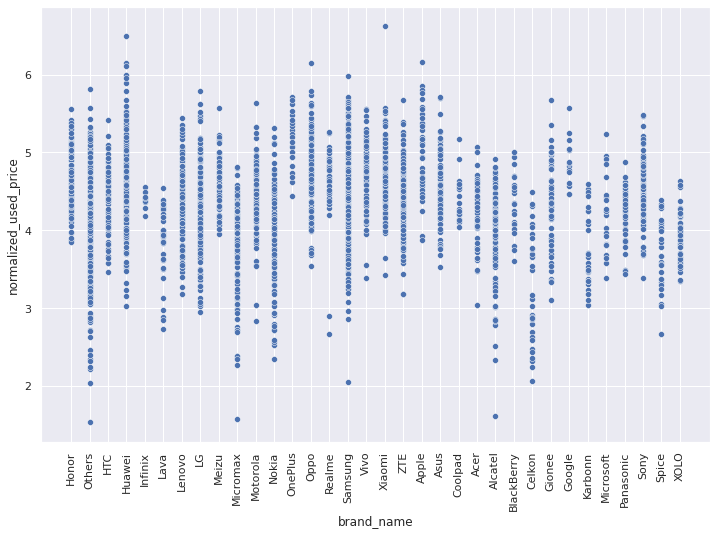

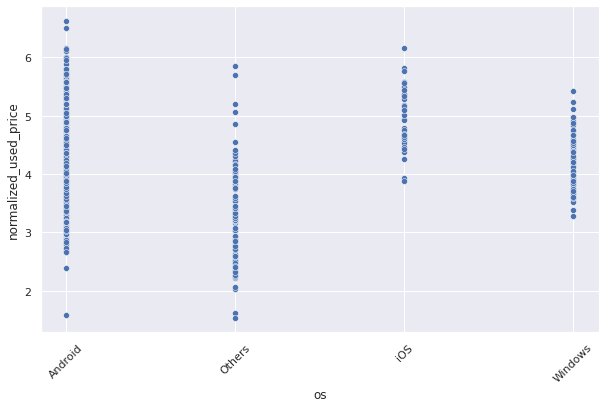

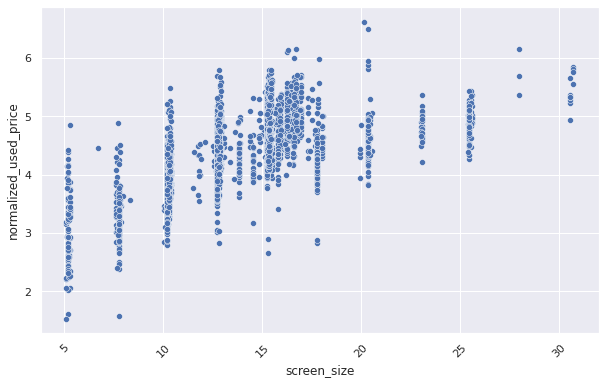

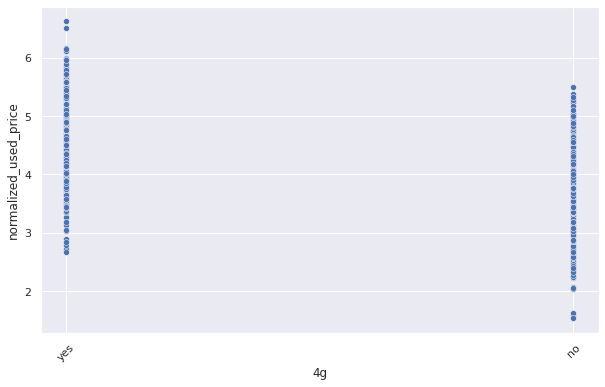

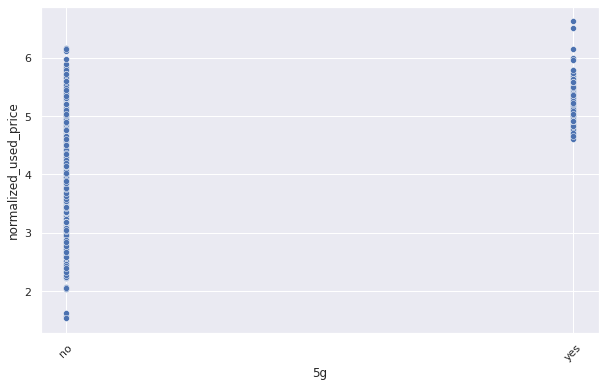

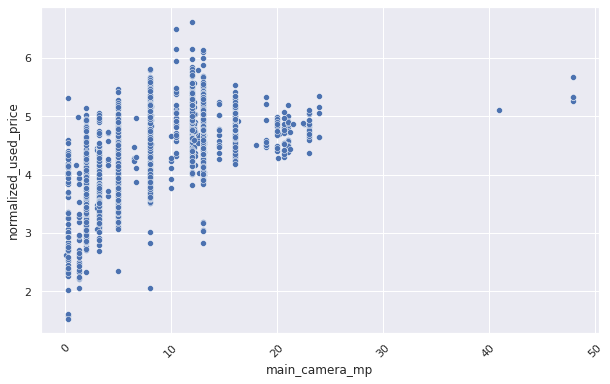

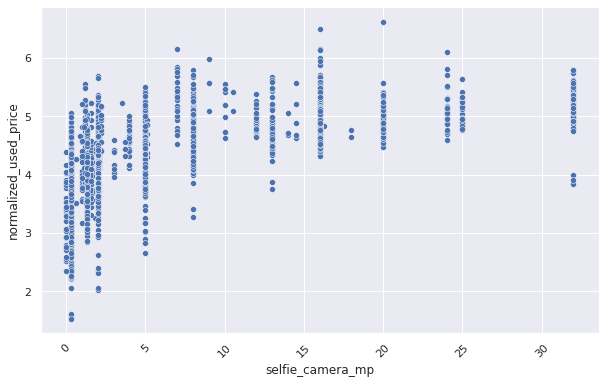

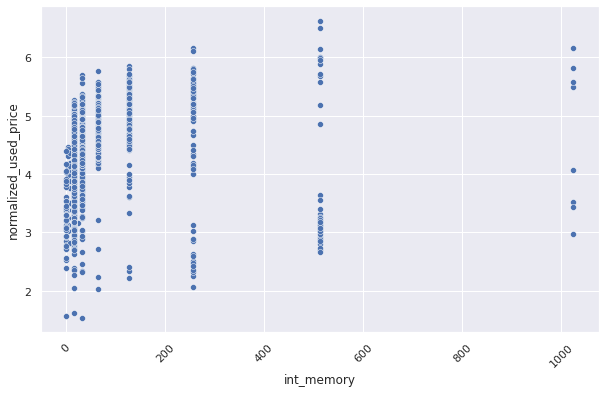

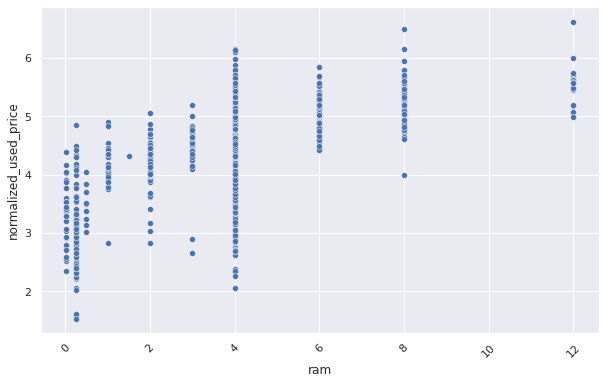

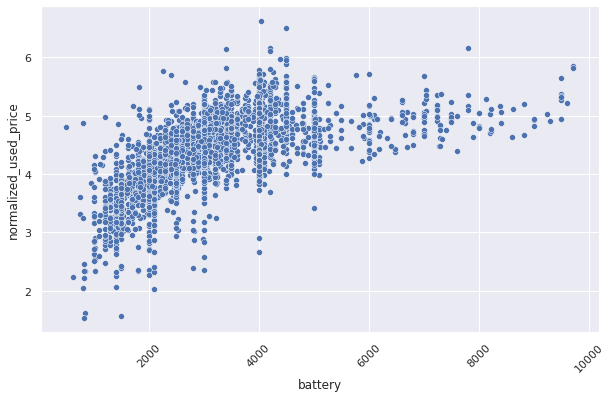

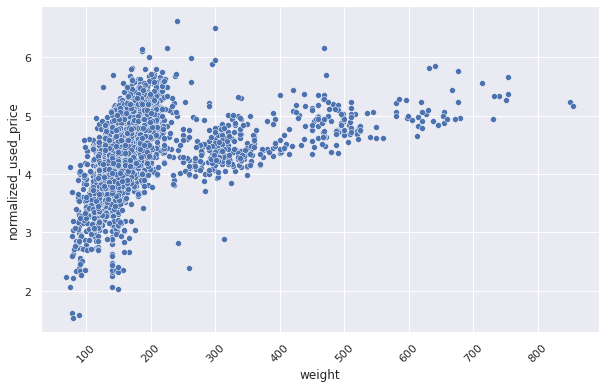

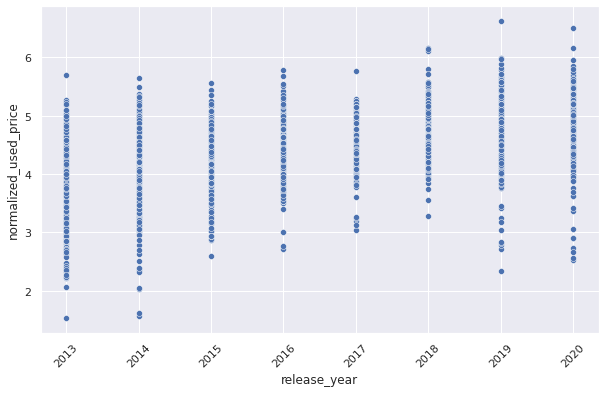

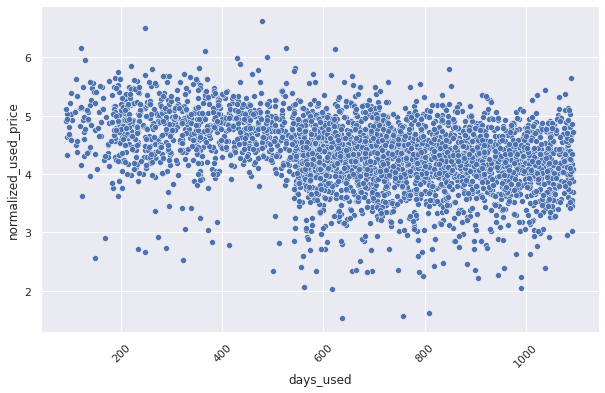

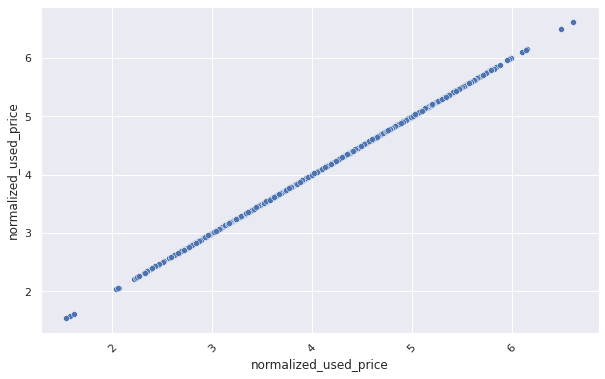

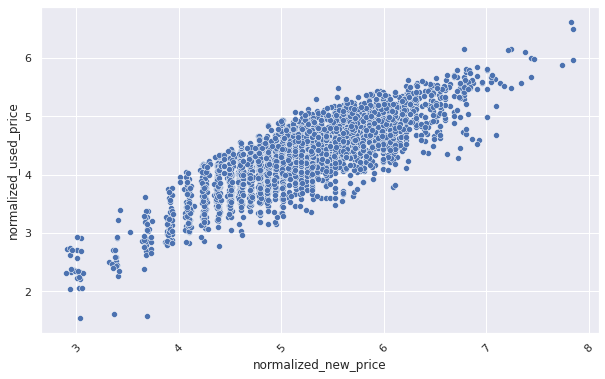

<IPython.core.display.Javascript object>

In [ ]:
for i in df.columns:
  if (i == 'brand_name'):
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=df, x=i, y="normalized_used_price")
    plt.xticks(rotation=90)
  else:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=i, y="normalized_used_price")
    plt.xticks(rotation=45)
  plt.show()

Some positive correlations between normalized_used_price and screen_size, main_camera_mp, selfie_camera_mp, ram, battery, and weight. None look strictly linear, besides the plots between itself and normalized_new_price, so will be interesting to see what multicollinearity and VIF values I find!

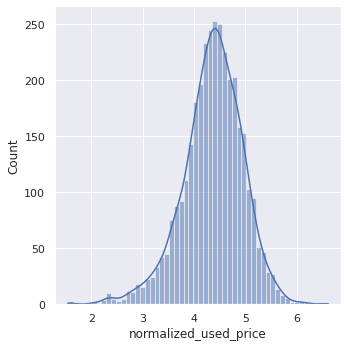

<IPython.core.display.Javascript object>

In [ ]:
# Answering question #1
sns.displot(data=df, x='normalized_used_price', kde=True);

The distribution of used prices looks pretty normal, as is suggested by the variable name.

In [ ]:
# Answering #2
print("Android devices account for {0:.2f}% of the used device market.".format((df[df['os'] == "Android"].shape[0] / df.shape[0]) * 100))

Android devices account for 93.05% of the used device market.


<IPython.core.display.Javascript object>

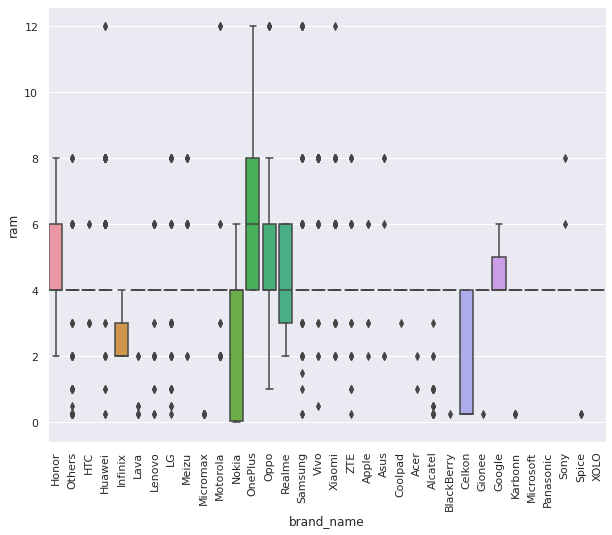

<IPython.core.display.Javascript object>

In [ ]:
# Answering #3
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='brand_name', y='ram')
plt.xticks(rotation=90)
plt.show()

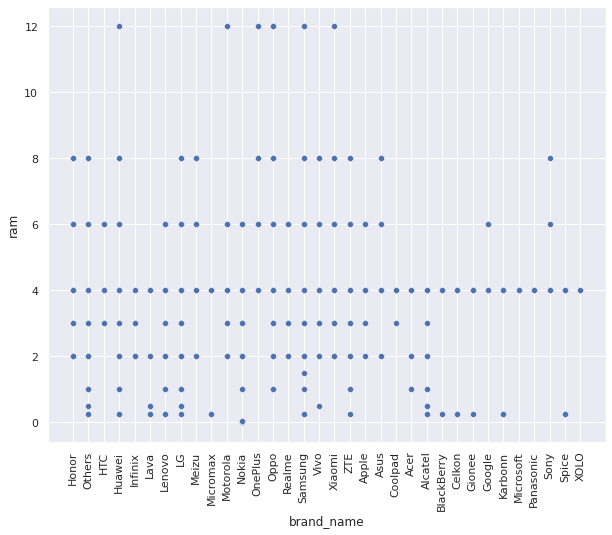

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='brand_name', y='ram')
plt.xticks(rotation=90)
plt.show()

The amount of ram doesn't seem to vary according to the brand, but some brands do seem to only utilize certain ram capacities, in comparison to others (e.g. Infinix only goes up to 4GB, while Samsung covers all the way up to 12GB).

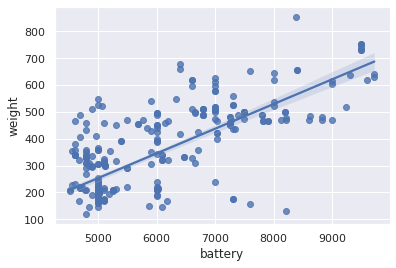

<IPython.core.display.Javascript object>

In [ ]:
# Answering #4
large_battery = df[df['battery'] > 4500]
sns.regplot(data=df, x=large_battery['battery'], y=large_battery['weight']);

It does appear that there is a positive correlation between weight and larger battery sizes, when the battery is greater than 4500 mAh.

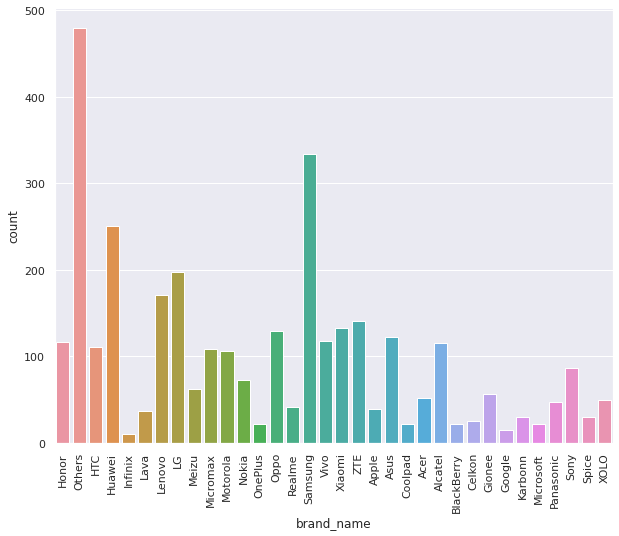

<IPython.core.display.Javascript object>

In [ ]:
#Answering #5
large_screen = df[df['screen_size'] > 6]
plt.figure(figsize=(10,8))
sns.countplot(data=large_screen, x='brand_name')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.loc[df['screen_size'] > 6.0].shape[0]

3362

<IPython.core.display.Javascript object>

3362 devices have a screen size of 6cm or more.

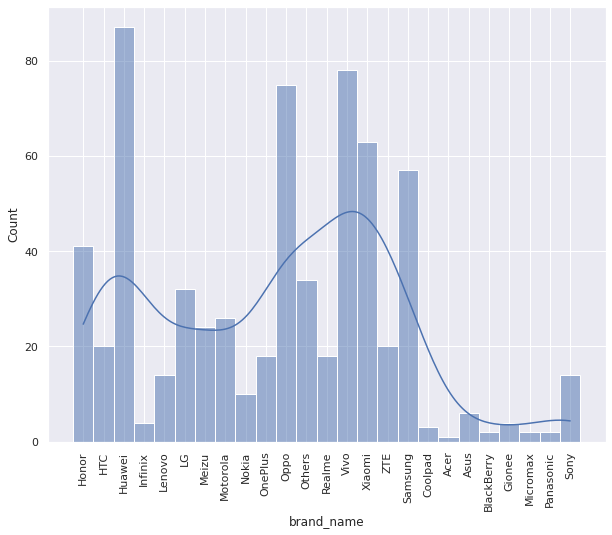

<IPython.core.display.Javascript object>

In [ ]:
#Answering #6
hq_selfies = df[df['selfie_camera_mp'] > 8]
plt.figure(figsize=(10,8))
sns.histplot(data=hq_selfies, x='brand_name', kde=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.loc[df['selfie_camera_mp'] > 8.0].shape[0]

655

<IPython.core.display.Javascript object>

The distribution is a bit abnormal and a little right-skewed. There are 655 devices, in total, which have selfie cameras with 8MP or better quality.

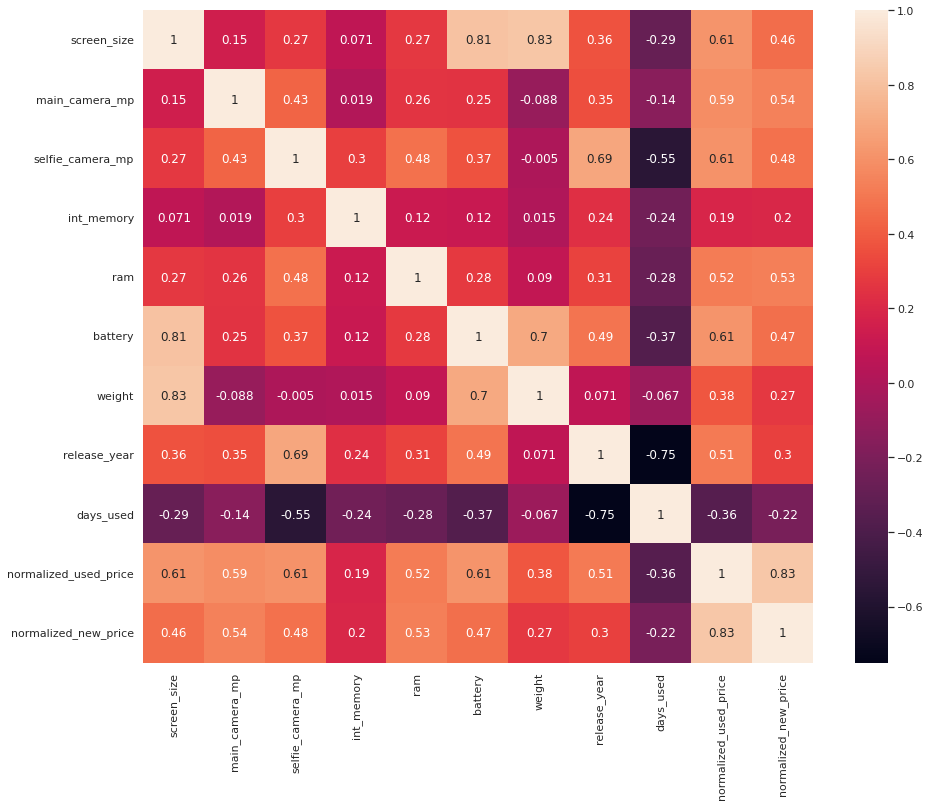

<IPython.core.display.Javascript object>

In [ ]:
#Answering #7
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Before processing the data, given a 60% correlation threshold, screen_size, selfie_camera_mp, battery, and normalized_new_price are correlated to the normalized_used_price.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###Missing Value Treatment

In [ ]:
# Checking number of missing values in dataframe
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
miss_cols = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']
for col in miss_cols:
  print(col, '-'*50)
  print(df[col].unique())

main_camera_mp --------------------------------------------------
[13.    8.    5.   10.5   3.15   nan  2.   16.    0.3  12.   14.5  48.
  3.   21.    1.3  13.1  24.    0.08 20.7  23.    1.   18.   12.2  12.3
 20.   20.2   4.   12.5  10.    6.5   6.7  41.   20.1  12.6  16.3  22.6
 19.   21.5  21.2   8.1   1.2  22.5 ]
selfie_camera_mp --------------------------------------------------
[ 5.   16.    8.   32.    2.    0.3  13.   14.5  24.   10.    1.3  20.
 25.    0.   12.    7.    1.2   3.    2.1   1.    4.    1.1    nan 10.5
  1.6   1.8   3.5   0.9   1.25 18.    1.9   9.    3.7  16.3   5.1   2.2
 14.    0.65]
int_memory --------------------------------------------------
[6.400e+01 1.280e+02 3.200e+01 1.600e+01 2.560e+02 5.120e+02 8.000e+00
 4.000e+00 5.000e-01 2.000e-01 1.000e-01 6.000e-02       nan 1.024e+03
 2.400e+01 1.000e-02]
ram --------------------------------------------------
[ 3.    8.    6.    4.    2.    1.   12.    0.5   0.25  0.03   nan  0.02
  1.5 ]
battery --------------

<IPython.core.display.Javascript object>

All missing values accounted for as NaN values in dataframe. Will replace with median values for each column

In [ ]:
# Missing values in: main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight
# All numerical values, impute with median values
df[miss_cols].median()

main_camera_mp         8.0
selfie_camera_mp       5.0
int_memory            32.0
ram                    4.0
battery             3000.0
weight               160.0
dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
# Getting sample row to check that imputation worked
df[df['weight'].isna() == True]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3002       XOLO  Android        12.70  yes  no            13.0   
3003       XOLO  Android        12.83  yes  no             8.0   
3004       XOLO  Android        12.70   no  no             8.0   
3005       XOLO  Android        10.29   no  no             5.0   
3006       XOLO  Android        12.70   no  no             5.0   
3007       XOLO  Windows        12.70   no  no             8.0   
3008       XOLO  Android        12.70   no  no             8.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3002               5.0        32.0  4.0   2400.0     NaN          2015   
3003               5.0        16.0  4.0   3200.0     NaN          2015   
3004               2.0        32.0  4.0   2100.0     NaN          2015   
3005               0.3        32.0  4.0   1800.0     NaN          2015   
3006               0.3        16.0  4.0   2500.0     NaN          2015   
3007               2.0        32.0  4.0   2200.0     NaN          2015   
3008               5.0        32.0  4.0   2500.0     NaN          2015   

      days_used  normalized_used_price  normalized_new_price  
3002        576               4.165890              4.930437  
3003        800               4.282068              5.189228  
3004        878               3.879706              4.081090  
3005       1036               3.823847              4.396053  
3006        679               3.837084              4.347176  
3007        838               3.707210              4.791733  
3008       1045               4.184642              4.785406

<IPython.core.display.Javascript object>

In [ ]:
# Isolating numerical columns needing imputation, creating dataframe of only those
miss_df = df[miss_cols]

# Creating lambda function to impute missing values with median of each column & applying to new dataframe
medianFiller = lambda x: x.fillna(x.median())
miss_df = miss_df.apply(medianFiller, axis=0)

# Replacing original columns with imputed ones
df[miss_cols] = miss_df

# Verifying success
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

In [ ]:
# Using sample row where weight was NaN to verify that median imputation was successful
df.iloc[3002]

brand_name                   XOLO
os                        Android
screen_size                  12.7
4g                            yes
5g                             no
main_camera_mp               13.0
selfie_camera_mp              5.0
int_memory                   32.0
ram                           4.0
battery                    2400.0
weight                      160.0
release_year                 2015
days_used                     576
normalized_used_price     4.16589
normalized_new_price     4.930437
Name: 3002, dtype: object

<IPython.core.display.Javascript object>

In [ ]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

Missing values have been imputed.

###Outlier Detection and Treatment

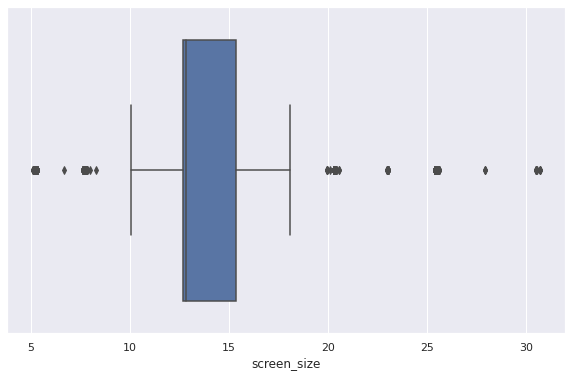

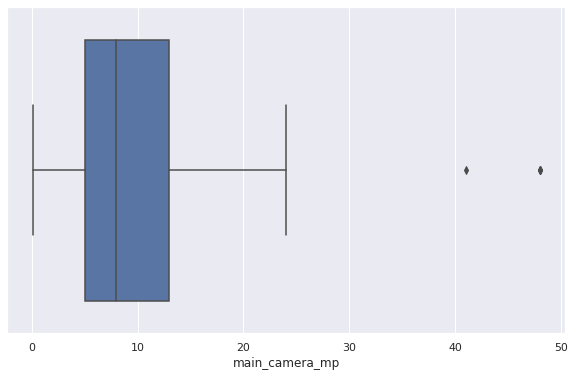

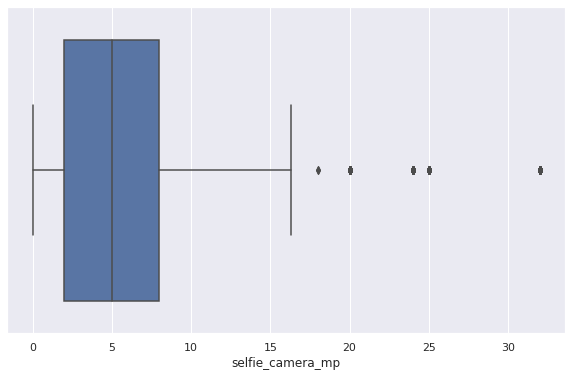

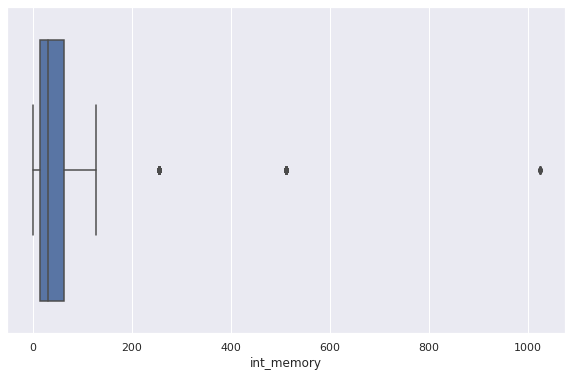

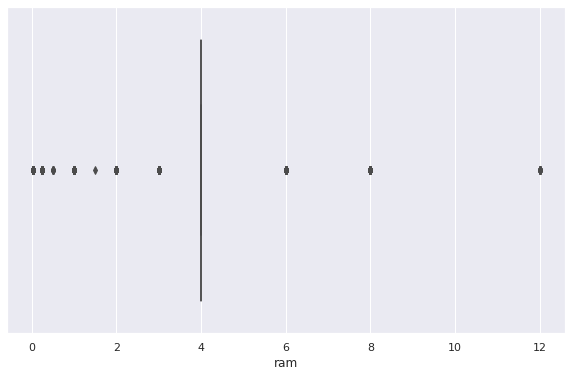

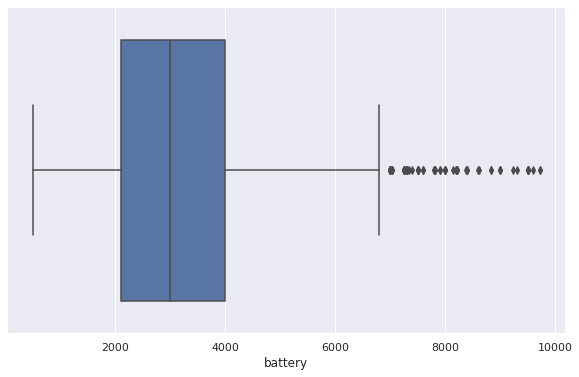

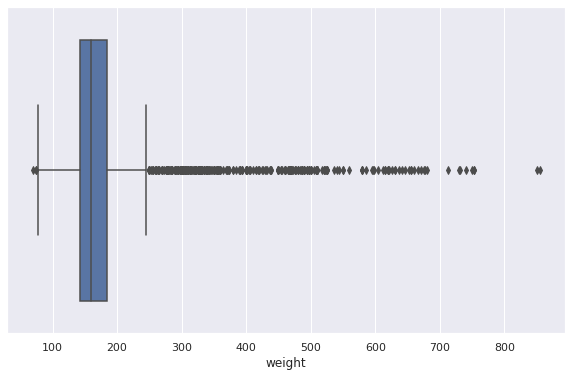

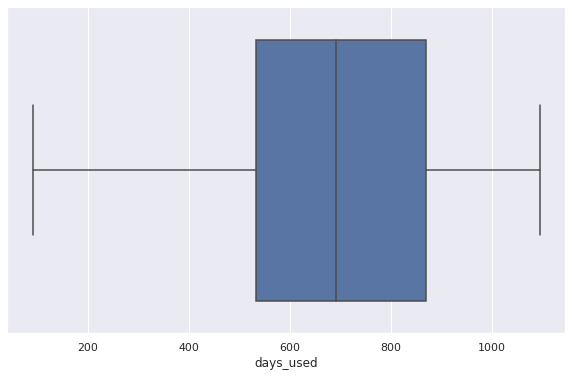

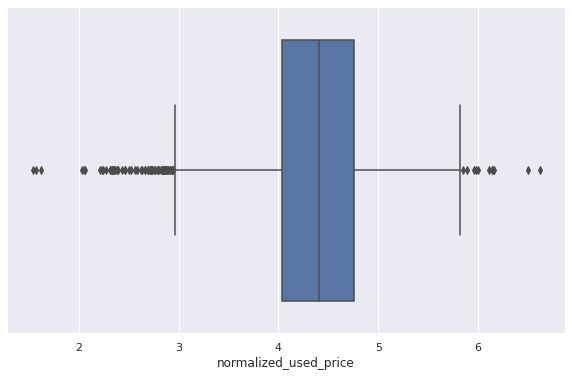

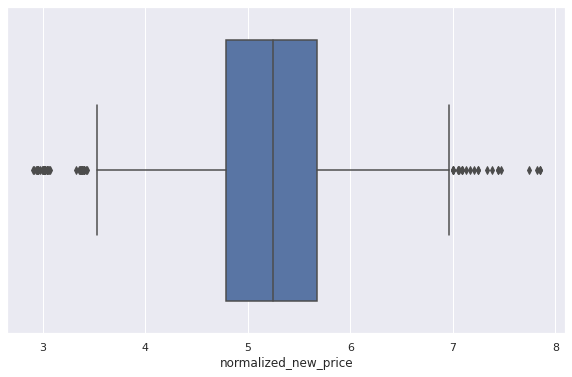

<IPython.core.display.Javascript object>

In [ ]:
for col in num_cols:
  plt.figure(figsize=(10,6))
  sns.boxplot(data=df, x=col)
  plt.show()

Only column that is really standing out to me as a potential issue is int_memory. I'm already hesitant to eliminate the others, just due to the fact that so many columns have outliers.

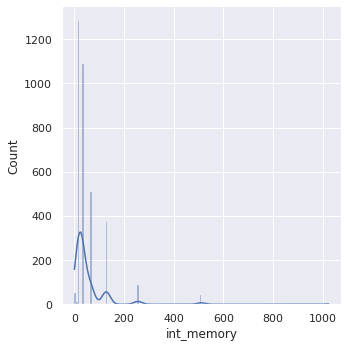

<IPython.core.display.Javascript object>

In [ ]:
sns.displot(data=df, x='int_memory', kde=True);

In [ ]:
df['int_memory'].max()

1024.0

<IPython.core.display.Javascript object>

In [ ]:
df.loc[df['int_memory'] == 1024.0]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
644       Apple      iOS        30.71  yes  no           12.00   
645       Apple      iOS        27.94  yes  no           12.00   
772        Asus  Android        12.70   no  no            8.00   
791        Asus  Android        10.34   no  no           13.00   
1468       Lava  Android        10.16   no  no            2.00   
1940   Micromax  Android        10.08   no  no            3.15   
2251     Others  Android        12.70   no  no            5.00   
2355    Samsung  Android        15.34  yes  no           12.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
644                7.0      1024.0  4.0   9720.0   631.0          2018   
645                7.0      1024.0  4.0   7812.0   468.0          2018   
772                0.3      1024.0  4.0   2500.0   160.0          2014   
791                1.2      1024.0  4.0   1820.0   126.0          2014   
1468               0.3      1024.0  4.0   1400.0   113.0          2013   
1940               0.3      1024.0  4.0   1450.0   118.0          2013   
2251               0.3      1024.0  4.0   2200.0   170.0          2013   
2355               9.0      1024.0  4.0   4100.0   175.0          2019   

      days_used  normalized_used_price  normalized_new_price  
644         543               5.808022              7.003847  
645         525               6.158969              6.778899  
772         860               3.523120              4.594413  
791         772               5.494953              5.555012  
1468        595               2.978077              3.934958  
1940        836               3.437208              4.503912  
2251        584               4.070905              5.135798  
2355        291               5.569718              6.957269

<IPython.core.display.Javascript object>

I will not treat int_memory as having outliers, because it appears there the two iOS devices with high int_memory are likely tablets (both having very large screens, weight and batteries). The other devices, also likely tablets are all Android and have relatively similar stats to each other in other columns, as well.

### Feature Engineering

Elected to not do feature engineering, as data seems pretty complete, and I am asked to create a model based on the given variables.

## EDA

- It is a good idea to explore the data once again after manipulating it.

Rechecking all plots from initial EDA, just to see if there are any significant changes since treating the data

In [ ]:
cat_cols = ['brand_name', 'os', '4g', '5g', 'release_year']
for col in cat_cols:
  print(df[col].value_counts())
  print("Unique vals: ", df[col].nunique())
  print('-'*50)

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64
Unique vals:  34
--------------------------------------------------
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64
Unique vals:  4
--------------------------------------------------
yes    2335
no     1119
Name: 4g, dtype: int64
Unique vals:  2
--------------------------------------------------
no     3302
yes     1

<IPython.core.display.Javascript object>

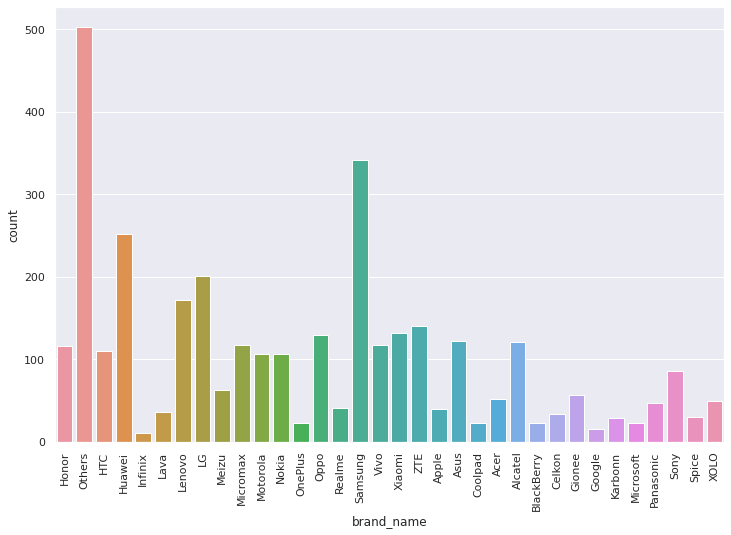

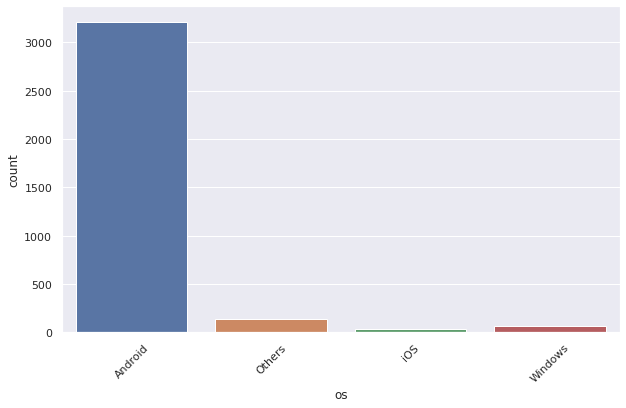

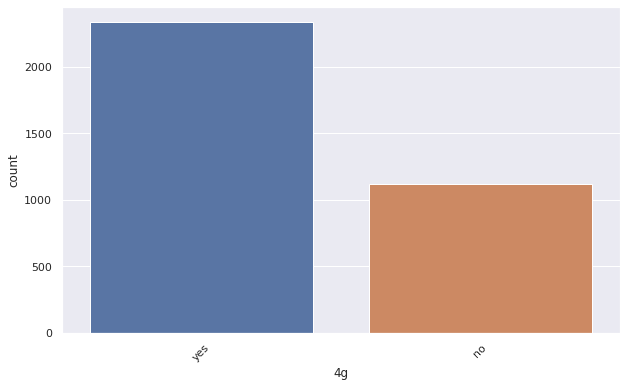

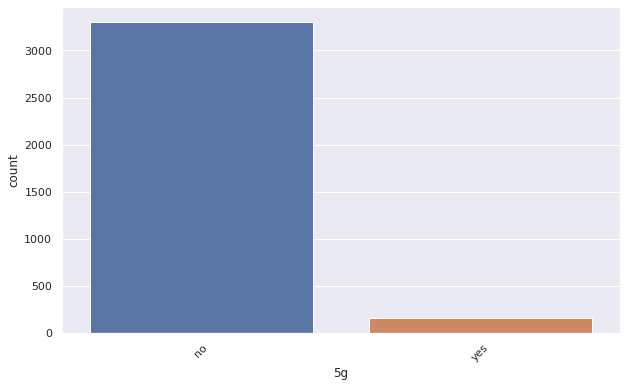

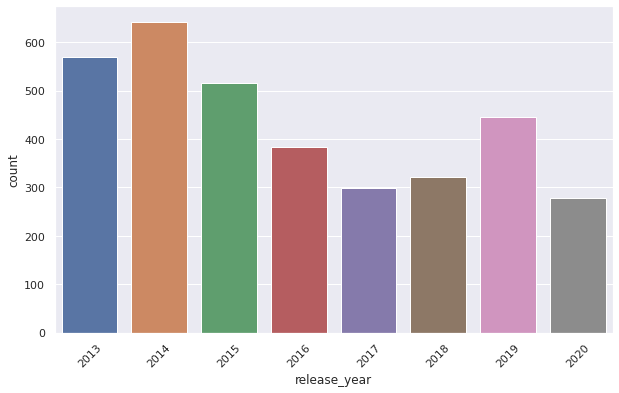

<IPython.core.display.Javascript object>

In [ ]:
for col in cat_cols:
  if (col == 'brand_name'):
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
  else:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
plt.show()

<Figure size 720x432 with 0 Axes>

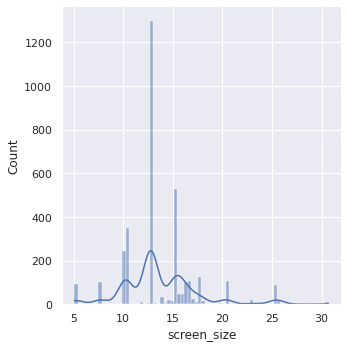

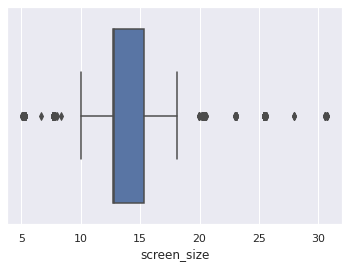

<Figure size 720x432 with 0 Axes>

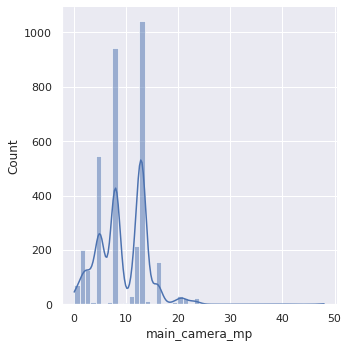

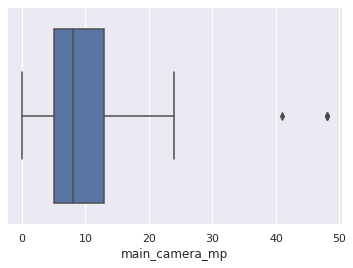

<Figure size 720x432 with 0 Axes>

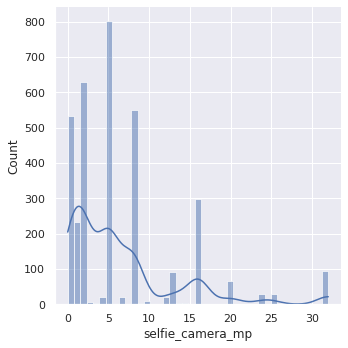

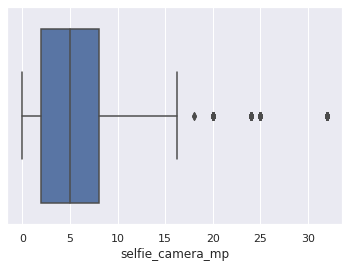

<Figure size 720x432 with 0 Axes>

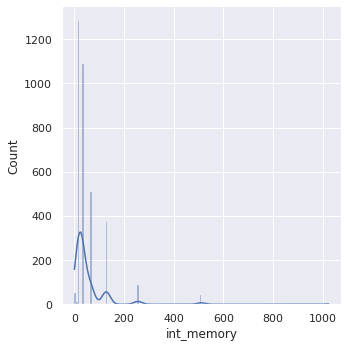

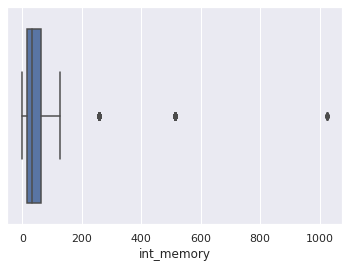

<Figure size 720x432 with 0 Axes>

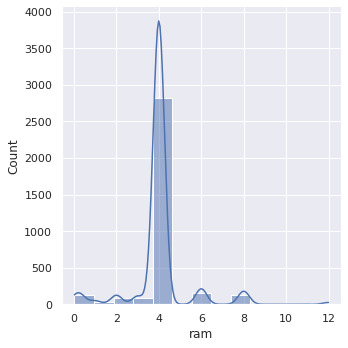

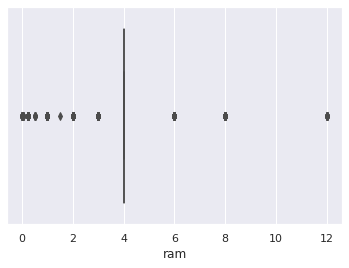

<Figure size 720x432 with 0 Axes>

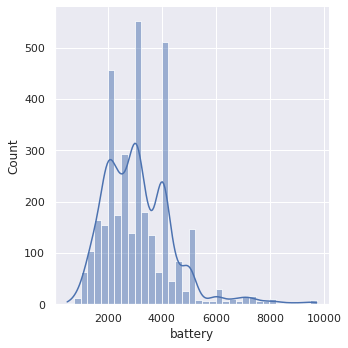

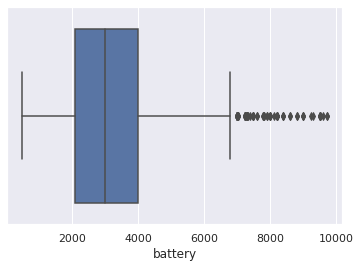

<Figure size 720x432 with 0 Axes>

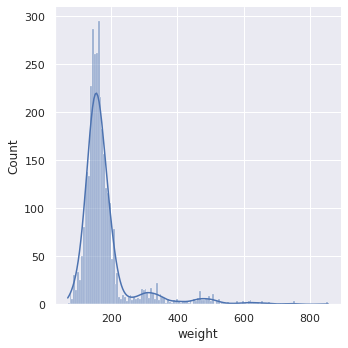

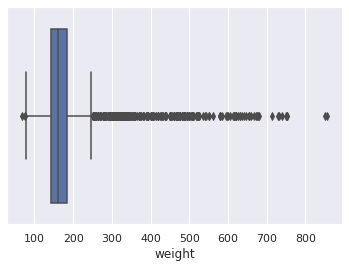

<Figure size 720x432 with 0 Axes>

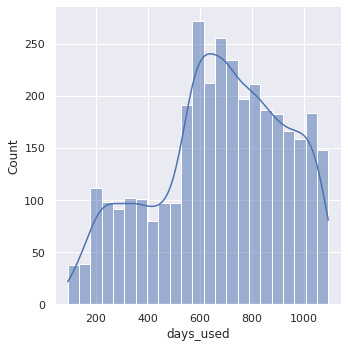

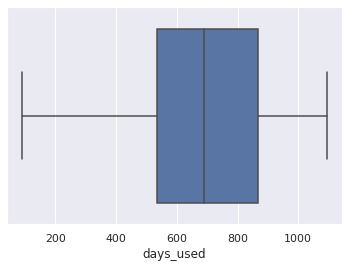

<Figure size 720x432 with 0 Axes>

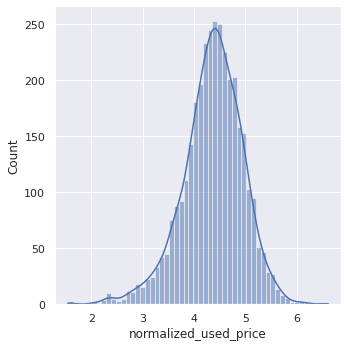

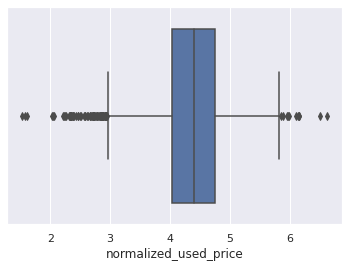

<Figure size 720x432 with 0 Axes>

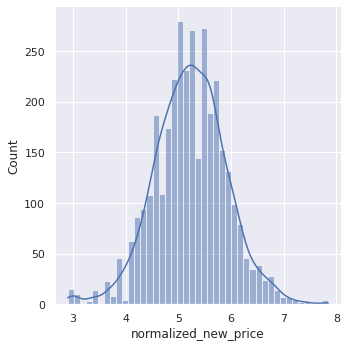

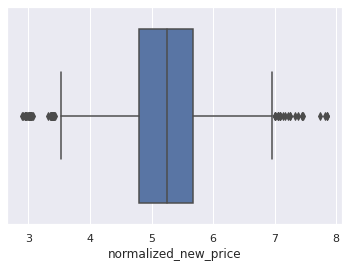

<IPython.core.display.Javascript object>

In [ ]:
num_cols = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price']
for col in num_cols:
  plt.figure(figsize=(10,6))
  sns.displot(data=df, x=col, kde=True)
  plt.show()
  sns.boxplot(data=df, x=col)
  plt.show()

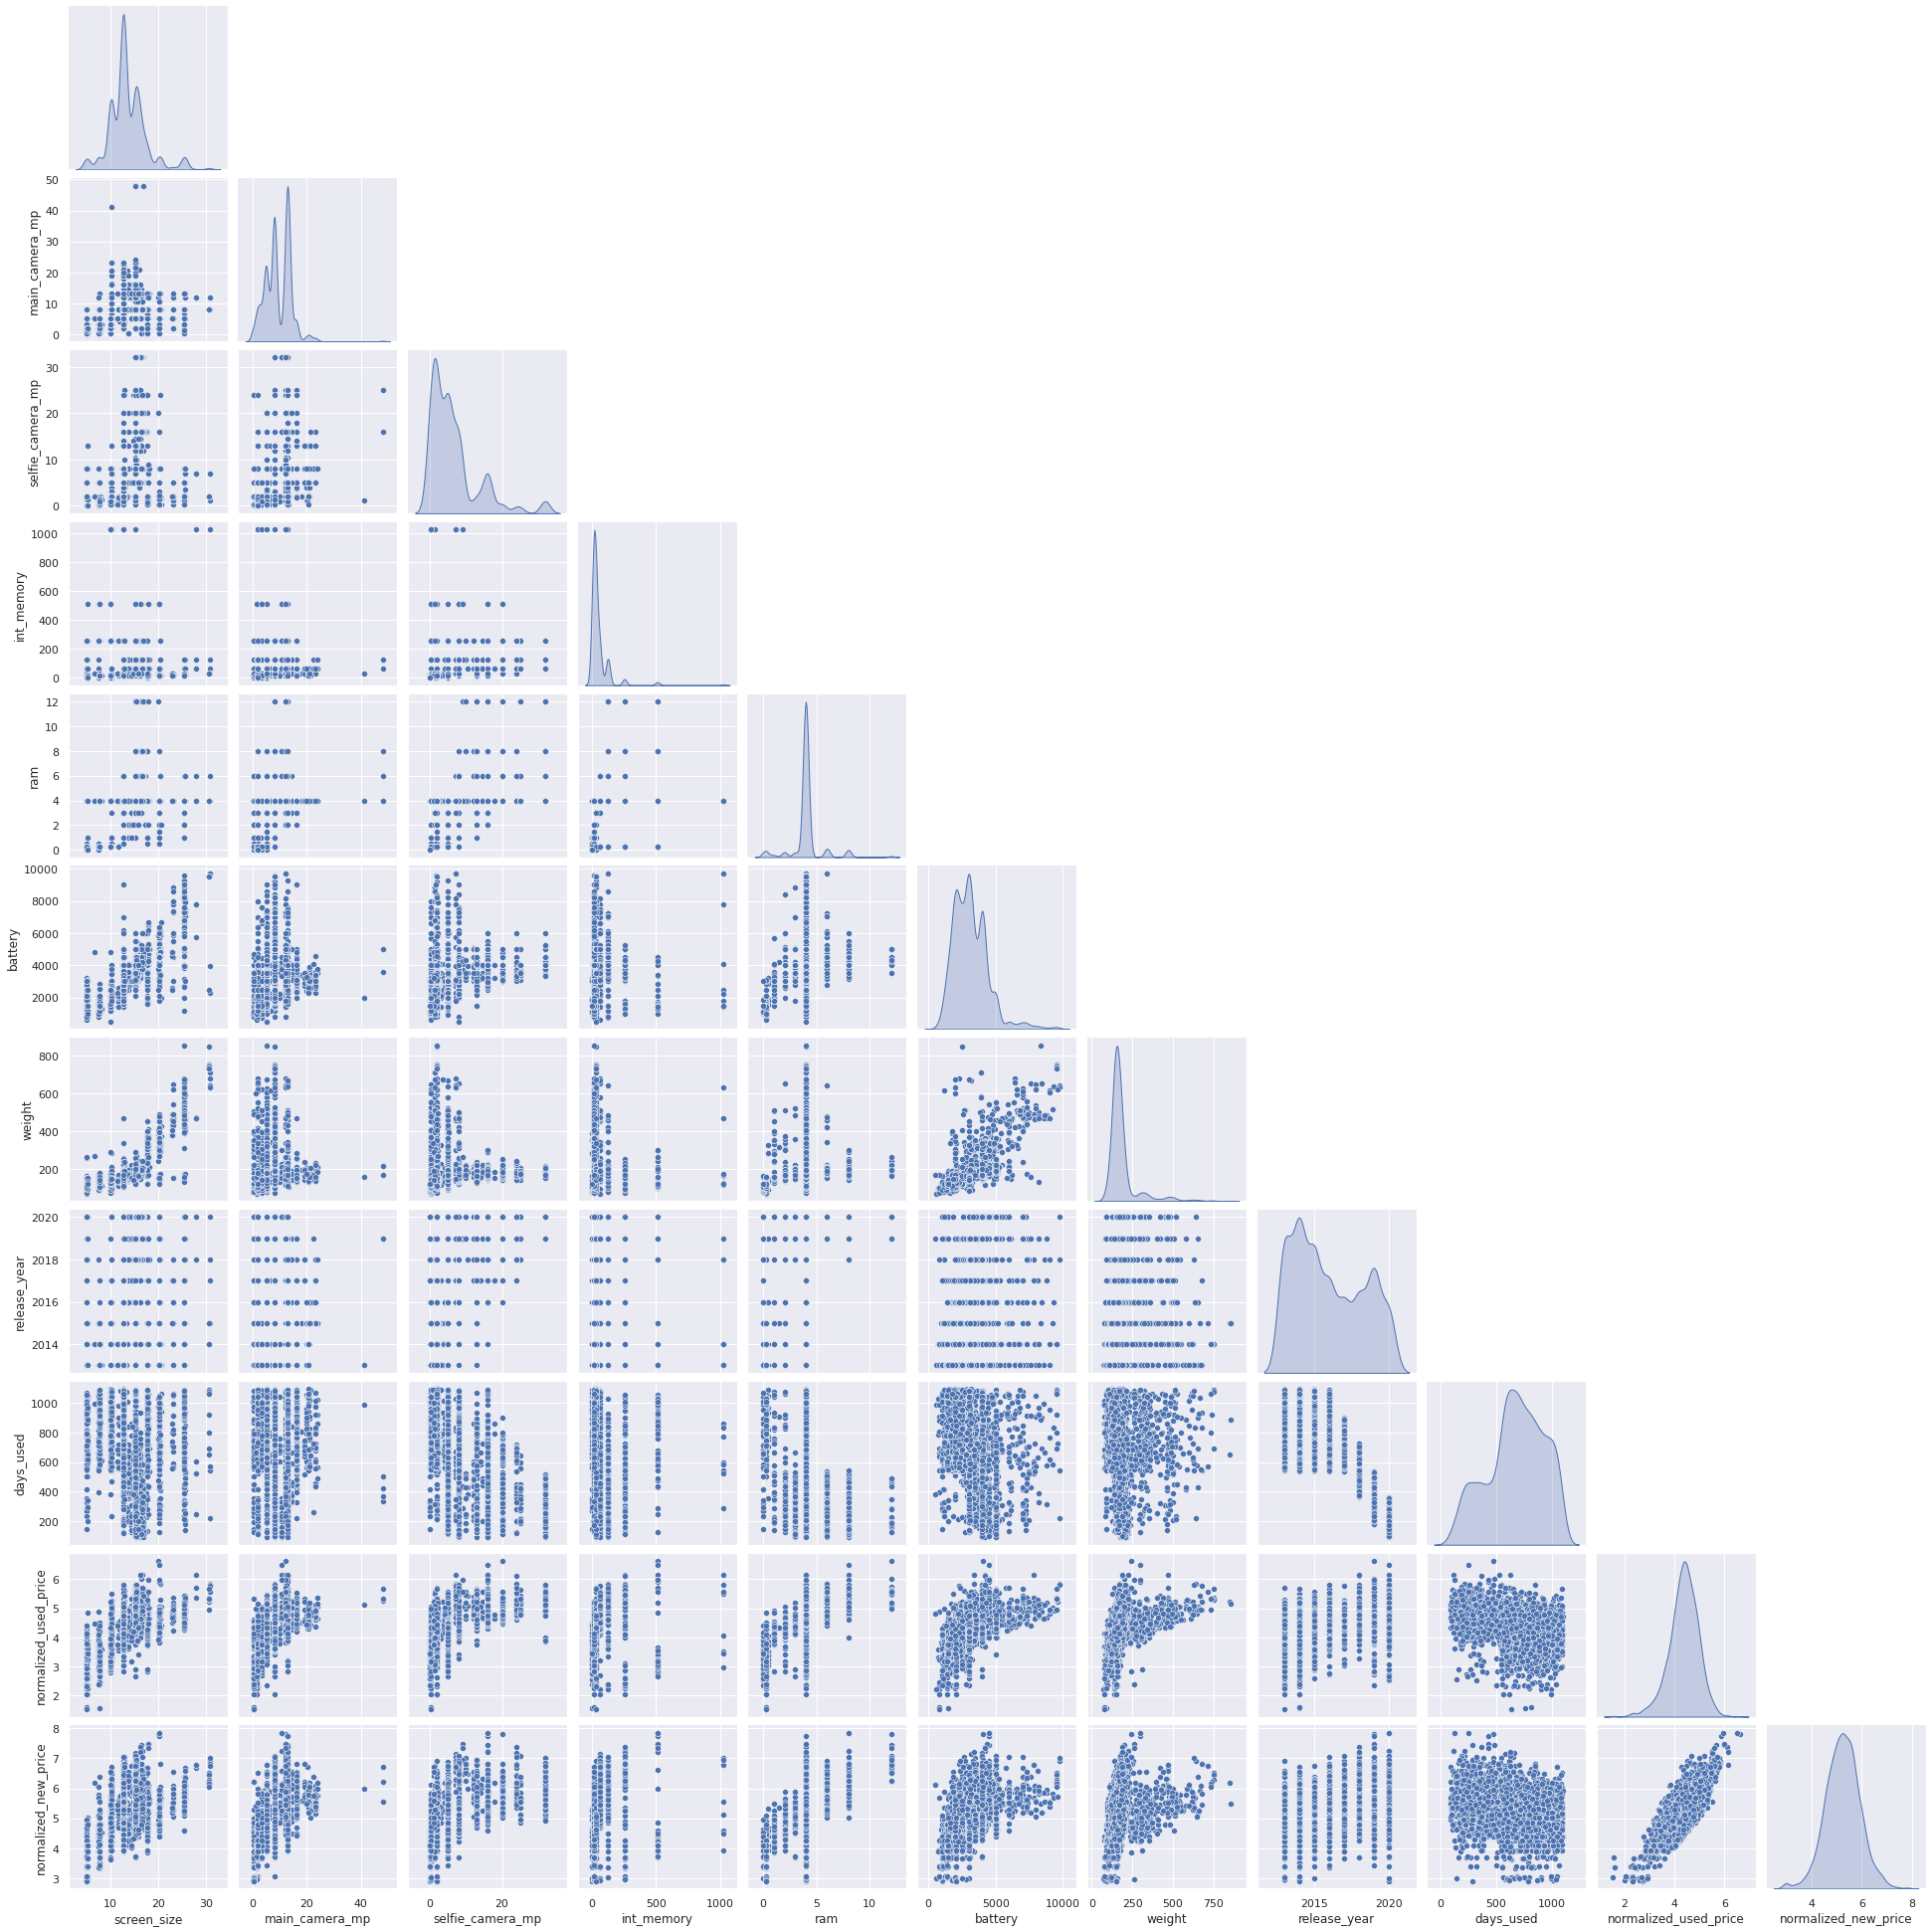

<IPython.core.display.Javascript object>

In [ ]:
sns.pairplot(data=df, diag_kind='kde', corner=True);

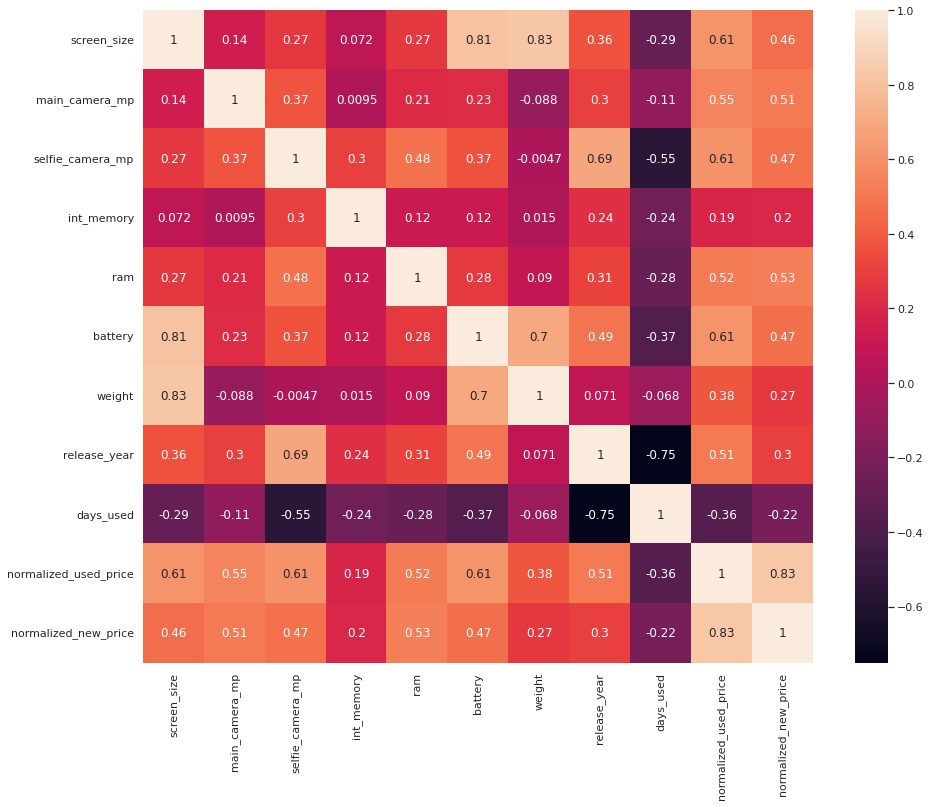

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

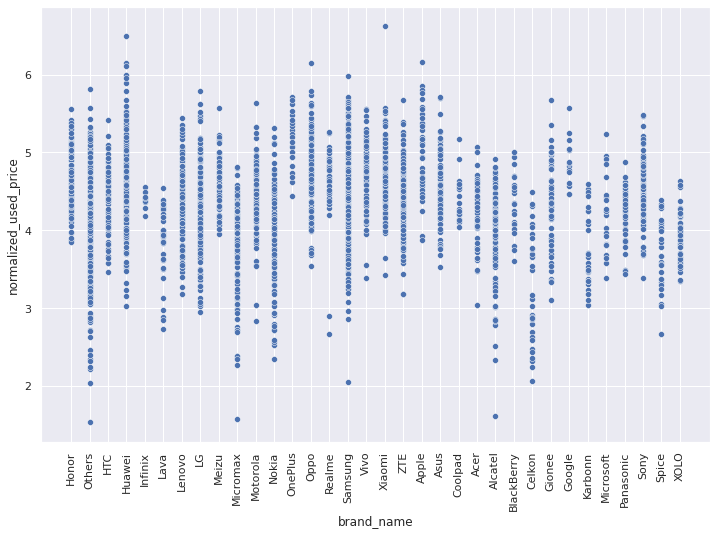

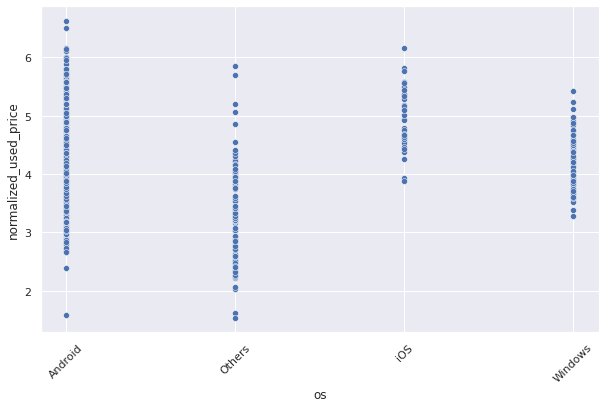

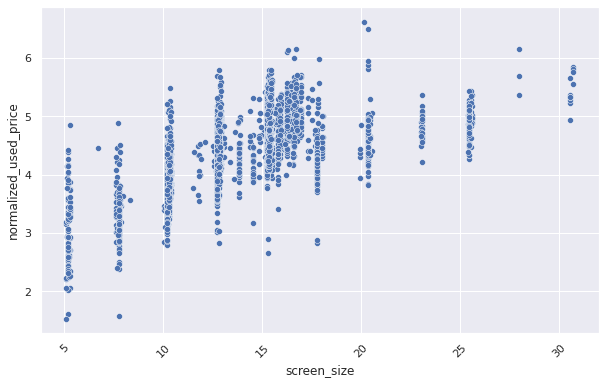

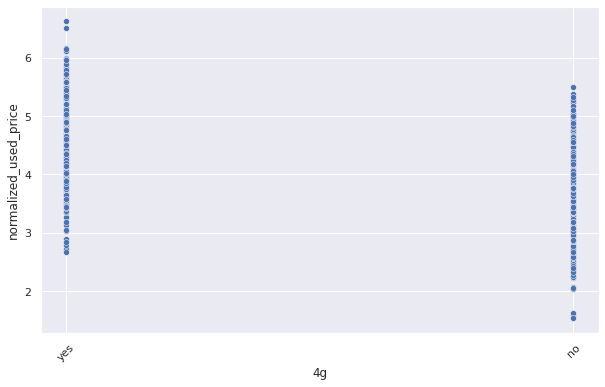

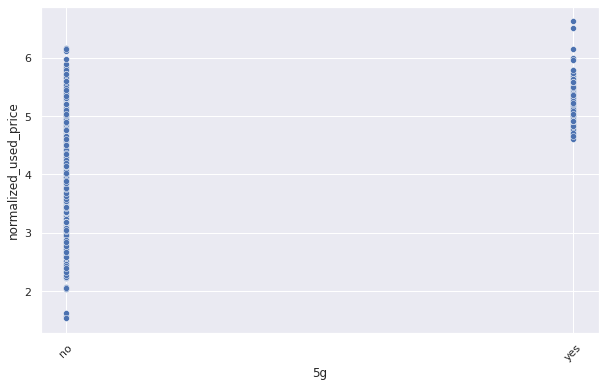

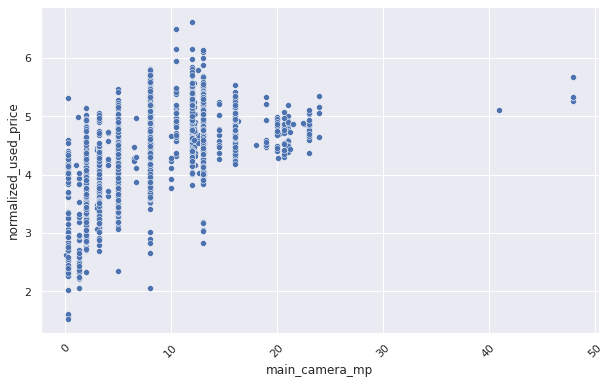

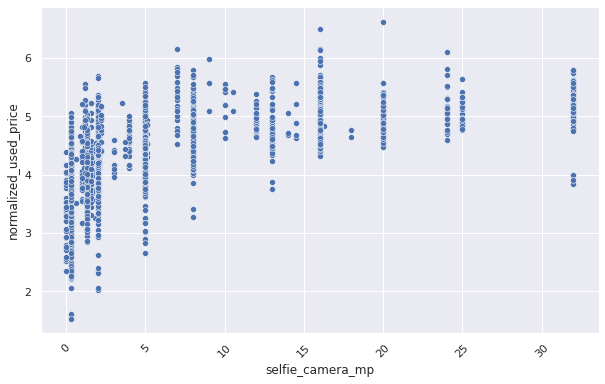

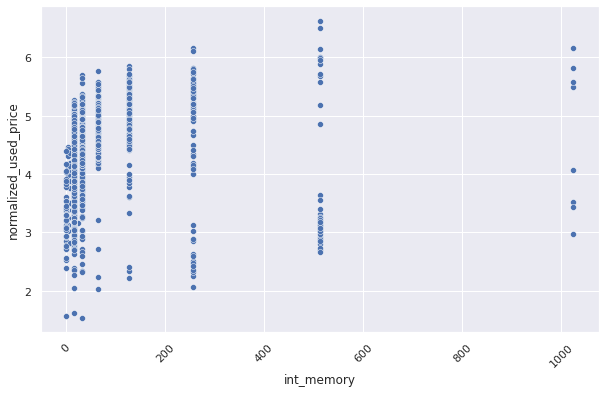

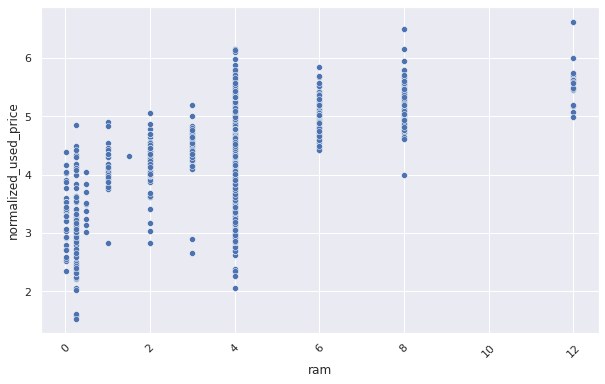

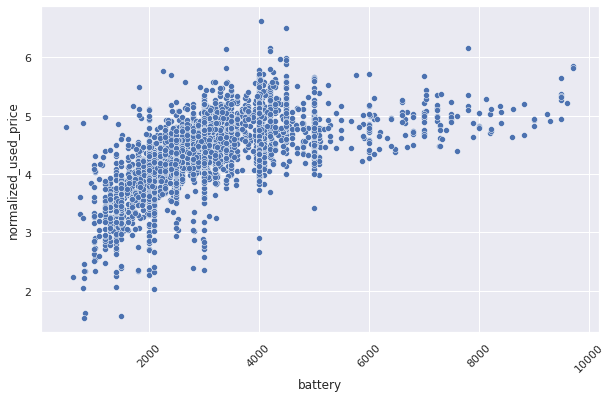

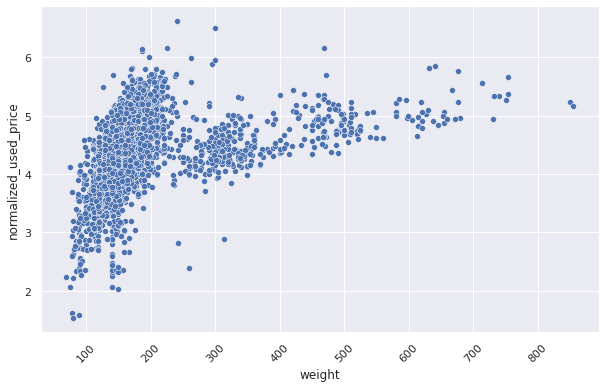

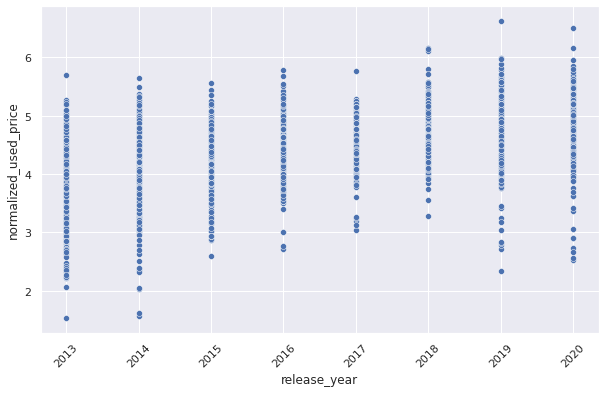

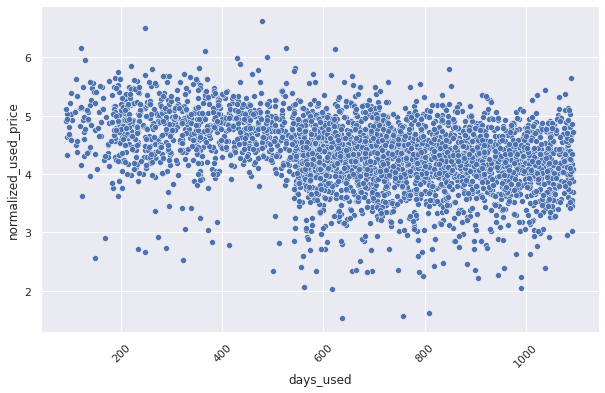

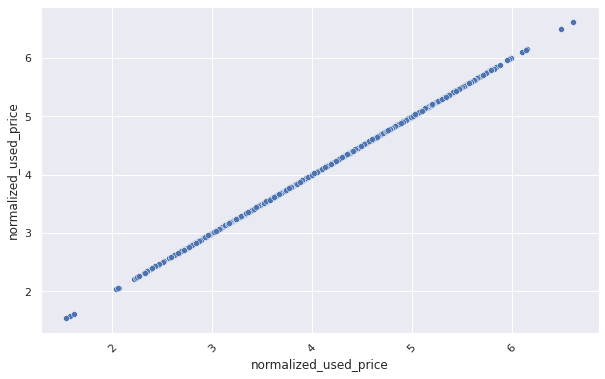

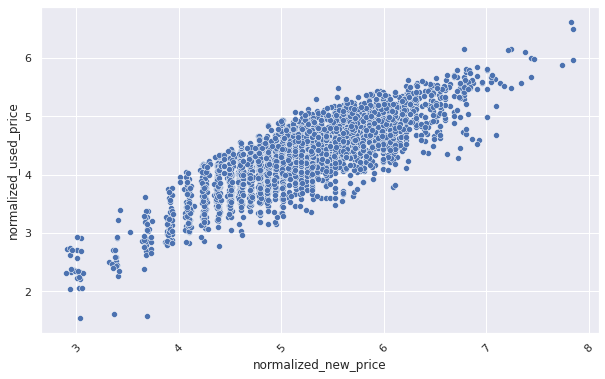

<IPython.core.display.Javascript object>

In [ ]:
for i in df.columns:
  if (i == 'brand_name'):
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=df, x=i, y="normalized_used_price")
    plt.xticks(rotation=90)
  else:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=i, y="normalized_used_price")
    plt.xticks(rotation=45)
  plt.show()

Not seeing any extreme changes in distributions or correlations, so hopefully data is still reflective of sample, but also a bit more fulfilling.

In [ ]:
# Getting dummy variables for categorical variables, chose not to drop any due to brand & os loyalties in the real world
df = pd.get_dummies(df, columns=['brand_name', 'os', '5g', '4g', ], drop_first=True)
df.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

   weight  release_year  days_used  normalized_used_price  ...  \
0   146.0          2020        127               4.307572  ...   
1   213.0          2020        325               5.162097  ...   
2   213.0          2020        162               5.111084  ...   
3   480.0          2020        345               5.135387  ...   
4   185.0          2020        293               4.389995  ...   

   brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
0                 0                0                0                  0   
1                 0                0                0                  0   
2                 0                0                0                  0   
3                 0                0                0                  0   
4                 0                0                0                  0   

   brand_name_ZTE  os_Others  os_Windows  os_iOS  5g_yes  4g_yes  
0               0          0           0       0       0       1  
1               0          0           0       0       1       1  
2               0          0           0       0       1       1  
3               0          0           0       0       1       1  
4               0          0           0       0       0       1  

[5 rows x 49 columns]

<IPython.core.display.Javascript object>

In [ ]:
# Preparing to split data into train and test sets
# independent variables
x = df.drop(['normalized_used_price'], axis=1)
# dependent variable
y = df[['normalized_used_price']]

# adding intercept to data
x = sm.add_constant(x)

# splitting x and y into train and test sets in a 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
x_train.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  weight  release_year  days_used  ...  brand_name_Spice  \
3026   1800.0   120.0          2014        819  ...                 0   
1525   4050.0   225.0          2016        585  ...                 0   
1128   2550.0   162.0          2015        727  ...                 0   
3003   3200.0   160.0          2015        800  ...                 0   
2907   2900.0   160.0          2017        560  ...                 0   

      brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
3026                0                1                  0               0   
1525                0                0                  0               0   
1128                0                0                  0               0   
3003                0                1                  0               0   
2907                0                0                  0               0   

      os_Others  os_Windows  os_iOS  5g_yes  4g_yes  
3026          0           0       0       0       0  
1525          0           0       0       0       1  
1128          0           0       0       0       0  
3003          0           0       0       0       1  
2907          0           0       0       0       1  

[5 rows x 49 columns]

<IPython.core.display.Javascript object>

## Model Building - Linear Regression

In [ ]:
olsmod = sm.OLS(y_train, x_train).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                           03:45:28   Log-Likelihood:                 124.22
No. Observations:                   2417   AIC:                            -150.4
Df Residuals:                       2368   BIC:                             133.3
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

## Model Performance Check

In [ ]:
print("The coefficient of determination (R-squared) is ", olsmod.rsquared)

The coefficient of determination (R-squared) is  0.8449333686368375


<IPython.core.display.Javascript object>

This is very exciting for me, as that indicates a spectacular amount of the variance in data has been explained by the model already. My next step was taking a preliminary look at the p-values (P>|t|), and I noticed that these values are at absolute 0:
* screen_size
* main_camera_mp
* selfie_camera_mp
* ram
* weight
* release_year
* normalized_new_price
which would indicate that these variables need to stay in the model, because in each case, we must reject the null hypothesis that says each predictor variable does not affect the dependent variable.

brand_name_Realme, brand_name_Xiaomi, and 4g_yes also had values that were below 0.05 for hypothesis testing, which means that these may need to be left in, as well. But first, I will test for multicollinearity in the data.

###Multicollinearity

In [ ]:
# Checking VIF for the predictor variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    3.780344e+06
screen_size              7.680705e+00
main_camera_mp           2.136597e+00
selfie_camera_mp         2.808416e+00
int_memory               1.361465e+00
ram                      2.258272e+00
battery                  4.073582e+00
weight                   6.380746e+00
release_year             4.884645e+00
days_used                2.669393e+00
normalized_new_price     3.121941e+00
brand_name_Alcatel       3.405629e+00
brand_name_Apple         1.305691e+01
brand_name_Asus          3.330500e+00
brand_name_BlackBerry    1.632240e+00
brand_name_Celkon        1.773986e+00
brand_name_Coolpad       1.466522e+00
brand_name_Gionee        1.951248e+00
brand_name_Google        1.322242e+00
brand_name_HTC           3.409765e+00
brand_name_Honor         3.345910e+00
brand_name_Huawei        5.986382e+00
brand_name_Infinix       1.283540e+00
brand_name_Karbonn       1.573183e+00
brand_name_LG            4.848734e+00
brand_name_Lava          1.711294e+0

<IPython.core.display.Javascript object>

VIFs that are above 5:
* brand_name_Apple - 13.05691
* os_iOS - 11.78485
* brand_name_Others - 9.710790
* screen_size - 7.680705
* brand_name_Samsung - 7.539528
* weight - 6.380746
* brand_name_Huawei - 5.986382

Given that screen_size and weight both had a p-value of 0.00, I will avoid dropping those for the time being and focus on the three variables with higher VIF's than them - brand_name_Apple, os_iOS, and brand_name_Others.

In [ ]:
# Dropping brand_name_Apple
x_train2 = x_train.drop(["brand_name_Apple"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2).fit()
print(
    "R-squared:",
    np.round(olsmod_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_1.rsquared_adj, 3)
)

R-squared: 0.845 
Adjusted R-squared: 0.842


<IPython.core.display.Javascript object>

No change to R-squared or adjusted R-squared when dropping brand_name_Apple, so I haven't broken anything....yet. This is a step in the right direction!

In [ ]:
# Dropping os_iOS
x_train3 = x_train.drop(["os_iOS"], axis=1)
olsmod_2 = sm.OLS(y_train, x_train3).fit()
print(
    "R-squared:",
    np.round(olsmod_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_2.rsquared_adj, 3)
)

R-squared: 0.845 
Adjusted R-squared: 0.842


<IPython.core.display.Javascript object>

No change to R-squared or adjusted R-squared when dropping os_iOS, so I will press on!

In [ ]:
# Dropping brand_name_Others
x_train4 = x_train.drop(["brand_name_Others"], axis=1)
olsmod_3 = sm.OLS(y_train, x_train4).fit()
print(
    "R-squared:",
    np.round(olsmod_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_3.rsquared_adj, 3)
)

R-squared: 0.845 
Adjusted R-squared: 0.842


<IPython.core.display.Javascript object>

No change to R-squared or adjusted R-squared when dropping brand_name_Others, so I will keep dropping others.

So far, so good! I will drop these three, one by one:
* brand_name_Apple
* os_iOS
* brand_name_Others

In [ ]:
# Now dropping variables one at a time from original training set, starting with brand_name_Apple
x_train = x_train.drop(["brand_name_Apple"], axis=1)

olsmod_4 = sm.OLS(y_train, x_train).fit()
print(olsmod_4.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     274.6
Date:                   Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                           03:52:59   Log-Likelihood:                 124.22
No. Observations:                   2417   AIC:                            -152.4
Df Residuals:                       2369   BIC:                             125.5
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

In [ ]:
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                    3.773731e+06
screen_size              7.646967e+00
main_camera_mp           2.135666e+00
selfie_camera_mp         2.787127e+00
int_memory               1.361451e+00
ram                      2.250072e+00
battery                  4.071593e+00
weight                   6.378178e+00
release_year             4.875976e+00
days_used                2.668859e+00
normalized_new_price     3.105535e+00
brand_name_Alcatel       3.230698e+00
brand_name_Asus          3.143419e+00
brand_name_BlackBerry    1.561062e+00
brand_name_Celkon        1.730959e+00
brand_name_Coolpad       1.435433e+00
brand_name_Gionee        1.886289e+00
brand_name_Google        1.293468e+00
brand_name_HTC           3.239786e+00
brand_name_Honor         3.164287e+00
brand_name_Huawei        5.583233e+00
brand_name_Infinix       1.265106e+00
brand_name_Karbonn       1.543635e+00
brand_name_LG            4.564360e+00
brand_name_Lava          1.670643e+00
brand_name_Lenovo        4.291510e+0

<IPython.core.display.Javascript object>

os_iOS is now within acceptable range of < 2, so I will drop brand_name_Others, as it has the next highest VIF.

In [ ]:
# Practice-dropping brand_name_Others to see how it will perform
x_train5 = x_train.drop(["brand_name_Others"], axis=1)
olsmod_5 = sm.OLS(y_train, x_train5).fit()
print(
    "R-squared:",
    np.round(olsmod_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_5.rsquared_adj, 3)
)

R-squared: 0.845 
Adjusted R-squared: 0.842


<IPython.core.display.Javascript object>

brand_name_Others can still be dropped safely.

In [ ]:
# Dropping brand_name_Others
x_train = x_train.drop(["brand_name_Others"], axis=1)

olsmod_6 = sm.OLS(y_train, x_train).fit()
print(olsmod_6.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     280.7
Date:                   Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                           03:57:24   Log-Likelihood:                 124.20
No. Observations:                   2417   AIC:                            -154.4
Df Residuals:                       2370   BIC:                             117.7
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

In [ ]:
vif_series3 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                    3.773582e+06
screen_size              7.573685e+00
main_camera_mp           2.134414e+00
selfie_camera_mp         2.785325e+00
int_memory               1.360818e+00
ram                      2.246780e+00
battery                  4.071402e+00
weight                   6.352721e+00
release_year             4.875410e+00
days_used                2.668580e+00
normalized_new_price     3.104487e+00
brand_name_Alcatel       1.217771e+00
brand_name_Asus          1.199642e+00
brand_name_BlackBerry    1.124019e+00
brand_name_Celkon        1.173991e+00
brand_name_Coolpad       1.052988e+00
brand_name_Gionee        1.090960e+00
brand_name_Google        1.044897e+00
brand_name_HTC           1.220827e+00
brand_name_Honor         1.284541e+00
brand_name_Huawei        1.500456e+00
brand_name_Infinix       1.061589e+00
brand_name_Karbonn       1.073440e+00
brand_name_LG            1.342670e+00
brand_name_Lava          1.070998e+00
brand_name_Lenovo        1.298153e+0

<IPython.core.display.Javascript object>

Dropping brand_name_Others has also lowered the VIFs of brand_name_Huawei and brand_name_Samsung to below 2. The two highest values for VIF are now screen_size and weight, whose p-values had indicated not to drop them. Despite that, I will see what wil happen if I do drop them, just in case that's the right thing to do to avoid multicollinearity.

In [ ]:
# Practice-dropping screen_size to see how it affects the R-squared now
x_train6 = x_train.drop(["screen_size"], axis=1)
olsmod_7 = sm.OLS(y_train, x_train6).fit()
print(
    "R-squared:",
    np.round(olsmod_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_7.rsquared_adj, 3)
)

R-squared: 0.842 
Adjusted R-squared: 0.839


<IPython.core.display.Javascript object>

In [ ]:
#Practice-dropping weight to see how it affects the R-squared now
x_train7 = x_train.drop(["weight"], axis=1)
olsmod_8 = sm.OLS(y_train, x_train7).fit()
print(
    "R-squared:",
    np.round(olsmod_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_8.rsquared_adj, 3)
)

R-squared: 0.841 
Adjusted R-squared: 0.838


<IPython.core.display.Javascript object>

These still aren't significant enough decreases for me to want to leave them in the model, so I will start with dropping weight.

In [ ]:
x_train = x_train.drop(["weight"], axis=1)

<IPython.core.display.Javascript object>

In [ ]:
vif_series4 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                    3.637659e+06
screen_size              3.546096e+00
main_camera_mp           2.051396e+00
selfie_camera_mp         2.761564e+00
int_memory               1.360762e+00
ram                      2.243909e+00
battery                  3.674880e+00
release_year             4.696561e+00
days_used                2.655160e+00
normalized_new_price     3.102452e+00
brand_name_Alcatel       1.209830e+00
brand_name_Asus          1.198583e+00
brand_name_BlackBerry    1.123131e+00
brand_name_Celkon        1.173469e+00
brand_name_Coolpad       1.051947e+00
brand_name_Gionee        1.087491e+00
brand_name_Google        1.044604e+00
brand_name_HTC           1.219295e+00
brand_name_Honor         1.271000e+00
brand_name_Huawei        1.490749e+00
brand_name_Infinix       1.057474e+00
brand_name_Karbonn       1.070930e+00
brand_name_LG            1.337391e+00
brand_name_Lava          1.067335e+00
brand_name_Lenovo        1.294215e+00
brand_name_Meizu         1.128364e+0

<IPython.core.display.Javascript object>

release_year is the last variable close to 5, so I want to see what would happen if I were to drop this one, as well.

In [ ]:
# Practice-dropping release_year to see how it affects the R-squared now
x_train8 = x_train.drop(["release_year"], axis=1)
olsmod_9 = sm.OLS(y_train, x_train8).fit()
print(
    "R-squared:",
    np.round(olsmod_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_9.rsquared_adj, 3)
)

R-squared: 0.84 
Adjusted R-squared: 0.837


<IPython.core.display.Javascript object>

It appears it will be safe to drop release_year, as well, so I will do so.

In [ ]:
# Dropping release_year
x_train = x_train.drop(["release_year"], axis=1)

<IPython.core.display.Javascript object>

In [ ]:
vif_series5 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                    134.220002
screen_size                3.527437
main_camera_mp             2.032738
selfie_camera_mp           2.414755
int_memory                 1.344407
ram                        2.243116
battery                    3.617208
days_used                  1.834682
normalized_new_price       2.893523
brand_name_Alcatel         1.209830
brand_name_Asus            1.198241
brand_name_BlackBerry      1.121297
brand_name_Celkon          1.163560
brand_name_Coolpad         1.051460
brand_name_Gionee          1.087310
brand_name_Google          1.039626
brand_name_HTC             1.218068
brand_name_Honor           1.270449
brand_name_Huawei          1.490711
brand_name_Infinix         1.056719
brand_name_Karbonn         1.066235
brand_name_LG              1.337376
brand_name_Lava            1.067281
brand_name_Lenovo          1.292153
brand_name_Meizu           1.127129
brand_name_Micromax        1.222180
brand_name_Microsoft       1.490246
brand_name_Mot

<IPython.core.display.Javascript object>

In [ ]:
# Still have some multicollinearity, so will drop next highest VIF of battery
x_train9 = x_train.drop(["battery"], axis=1)
olsmod_10 = sm.OLS(y_train, x_train9).fit()
print(
    "R-squared:",
    np.round(olsmod_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_10.rsquared_adj, 3)
)

R-squared: 0.84 
Adjusted R-squared: 0.837


<IPython.core.display.Javascript object>

Not a significant enough decrease for me to keep this variable

In [ ]:
# Dropping battery
x_train = x_train.drop(["battery"], axis=1)

<IPython.core.display.Javascript object>

In [ ]:
vif_series6 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const                    132.123758
screen_size                1.570116
main_camera_mp             2.029506
selfie_camera_mp           2.410913
int_memory                 1.344275
ram                        2.243068
days_used                  1.823027
normalized_new_price       2.884103
brand_name_Alcatel         1.199405
brand_name_Asus            1.197502
brand_name_BlackBerry      1.121297
brand_name_Celkon          1.160066
brand_name_Coolpad         1.051075
brand_name_Gionee          1.078402
brand_name_Google          1.039123
brand_name_HTC             1.215712
brand_name_Honor           1.270041
brand_name_Huawei          1.490600
brand_name_Infinix         1.048957
brand_name_Karbonn         1.061880
brand_name_LG              1.336927
brand_name_Lava            1.066822
brand_name_Lenovo          1.288531
brand_name_Meizu           1.127054
brand_name_Micromax        1.222178
brand_name_Microsoft       1.490246
brand_name_Motorola        1.244284
brand_name_Nok

<IPython.core.display.Javascript object>

Next highest VIF is normalized_new_price, so I will investigate dropping this.

In [ ]:
x_train10 = x_train.drop(["normalized_new_price"], axis=1)
olsmod_11 = sm.OLS(y_train, x_train10).fit()
print(
    "R-squared:",
    np.round(olsmod_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_11.rsquared_adj, 3)
)

R-squared: 0.757 
Adjusted R-squared: 0.753


<IPython.core.display.Javascript object>

Significant decrease here, so I will not drop this and look into dropping selfie_camera_mp instead.

In [ ]:
x_train11 = x_train.drop(["selfie_camera_mp"], axis=1)
olsmod_12 = sm.OLS(y_train, x_train11).fit()
print(
    "R-squared:",
    np.round(olsmod_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_12.rsquared_adj, 3)
)

R-squared: 0.828 
Adjusted R-squared: 0.825


<IPython.core.display.Javascript object>

Drop is only of 0.012, so I will drop selfie_camera_mp, as well.

In [ ]:
# Dropping selfie_camera_mp
x_train = x_train.drop(["selfie_camera_mp"], axis=1)

vif_series7 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print("VIF values: \n\n{}\n".format(vif_series7))

VIF values: 

const                    131.805763
screen_size                1.569997
main_camera_mp             1.979984
int_memory                 1.300192
ram                        2.138028
days_used                  1.606609
normalized_new_price       2.856325
brand_name_Alcatel         1.198878
brand_name_Asus            1.196524
brand_name_BlackBerry      1.120506
brand_name_Celkon          1.160051
brand_name_Coolpad         1.050074
brand_name_Gionee          1.078183
brand_name_Google          1.038335
brand_name_HTC             1.215704
brand_name_Honor           1.263869
brand_name_Huawei          1.478852
brand_name_Infinix         1.046773
brand_name_Karbonn         1.061854
brand_name_LG              1.336695
brand_name_Lava            1.066820
brand_name_Lenovo          1.288419
brand_name_Meizu           1.120898
brand_name_Micromax        1.221362
brand_name_Microsoft       1.489420
brand_name_Motorola        1.244151
brand_name_Nokia           1.458475
brand_name_One

<IPython.core.display.Javascript object>

Besides normalized_new_price, which I've already determined needs to be kept, the only VIF above 2 is ram, so I will try dropping this.

In [ ]:
x_train12 = x_train.drop(["ram"], axis=1)
olsmod_13 = sm.OLS(y_train, x_train12).fit()
print(
    "R-squared:",
    np.round(olsmod_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_13.rsquared_adj, 3)
)

R-squared: 0.824 
Adjusted R-squared: 0.821


<IPython.core.display.Javascript object>

Only a drop of 0.004, so I will drop this variable.

In [ ]:
# Dropping ram
x_train = x_train.drop(["ram"], axis=1)

vif_series8 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print("VIF values: \n\n{}\n".format(vif_series8))

VIF values: 

const                    130.562062
screen_size                1.566326
main_camera_mp             1.979180
int_memory                 1.293421
days_used                  1.590230
normalized_new_price       2.613989
brand_name_Alcatel         1.197929
brand_name_Asus            1.196522
brand_name_BlackBerry      1.118651
brand_name_Celkon          1.146280
brand_name_Coolpad         1.050027
brand_name_Gionee          1.078183
brand_name_Google          1.038303
brand_name_HTC             1.215393
brand_name_Honor           1.263646
brand_name_Huawei          1.475010
brand_name_Infinix         1.043331
brand_name_Karbonn         1.061720
brand_name_LG              1.334593
brand_name_Lava            1.066339
brand_name_Lenovo          1.288418
brand_name_Meizu           1.119670
brand_name_Micromax        1.218672
brand_name_Microsoft       1.488930
brand_name_Motorola        1.243850
brand_name_Nokia           1.419218
brand_name_OnePlus         1.074697
brand_name_Opp

<IPython.core.display.Javascript object>

The only sign of multicollinearity is now normalized_new_price, so I will check one last time to see if it can be safely dropped now.

In [ ]:
x_train13 = x_train.drop(["normalized_new_price"], axis=1)
olsmod_14 = sm.OLS(y_train, x_train13).fit()
print(
    "R-squared:",
    np.round(olsmod_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsmod_14.rsquared_adj, 3)
)

R-squared: 0.713 
Adjusted R-squared: 0.708


<IPython.core.display.Javascript object>

In [ ]:
# Summary of the model
olsmod_15 = sm.OLS(y_train, x_train).fit()
print(olsmod_15.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.824
Model:                               OLS   Adj. R-squared:                  0.821
Method:                    Least Squares   F-statistic:                     271.0
Date:                   Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                           04:24:58   Log-Likelihood:                -29.709
No. Observations:                   2417   AIC:                             143.4
Df Residuals:                       2375   BIC:                             386.6
Df Model:                             41                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

P-values are now reliable for what to drop from the model. Also going to drop brand_name_Nokia because, after further testing, p-value increased to 0.056.

In [ ]:
cols_to_drop = ["brand_name_Alcatel", "brand_name_Asus", "brand_name_BlackBerry", "brand_name_Celkon", 
                "brand_name_Coolpad", "brand_name_Gionee", "brand_name_Google", "brand_name_HTC", 
                "brand_name_Honor", "brand_name_Huawei", "brand_name_Infinix", "brand_name_Karbonn", 
                "brand_name_LG", "brand_name_Lava", "brand_name_Lenovo", "brand_name_Meizu", 
                "brand_name_Micromax", "brand_name_Microsoft", "brand_name_Motorola", "brand_name_Nokia", 
                "brand_name_OnePlus", "brand_name_Panasonic", "brand_name_Samsung", "brand_name_Spice", 
                "brand_name_Vivo", "brand_name_XOLO", "brand_name_ZTE", "os_Others", "os_Windows"]
x_train14 = x_train.drop(cols_to_drop, axis=1)
olsmod_16 = sm.OLS(y_train, x_train14).fit()
print(olsmod_16.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.821
Model:                               OLS   Adj. R-squared:                  0.820
Method:                    Least Squares   F-statistic:                     916.4
Date:                   Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                           04:56:35   Log-Likelihood:                -51.918
No. Observations:                   2417   AIC:                             129.8
Df Residuals:                       2404   BIC:                             205.1
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [ ]:
# Making a df for testing the linear regression assumptions before using the model to predict
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()
df_pred["Fitted Values"] = olsmod_16.fittedvalues.values
df_pred["Residuals"] = olsmod_16.resid.values

df_pred.head()

Actual Values  Fitted Values  Residuals
0       4.087488       3.870936   0.216552
1       4.448399       4.645747  -0.197348
2       4.315353       4.268261   0.047092
3       4.282068       4.266344   0.015724
4       4.456438       4.346116   0.110322

<IPython.core.display.Javascript object>

### Test for Linearity and Independence

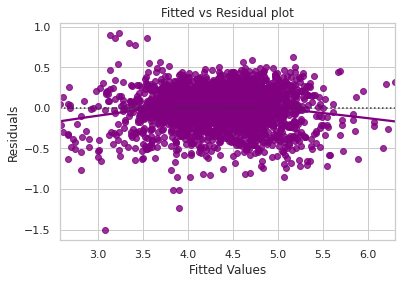

<IPython.core.display.Javascript object>

In [ ]:
# Plotting the fitted values against the residuals to see if there is any nonlinear pattern or if there is dependence
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

There doesn't seem to be an overly exaggerated pattern here, but I will check the pairplot for any pronounced nonlinear relationships that need transforming.

In [ ]:
x_train14.columns

Index(['const', 'screen_size', 'main_camera_mp', 'int_memory', 'days_used',
       'normalized_new_price', 'brand_name_Oppo', 'brand_name_Realme',
       'brand_name_Sony', 'brand_name_Xiaomi', 'os_iOS', '5g_yes', '4g_yes'],
      dtype='object')

<IPython.core.display.Javascript object>

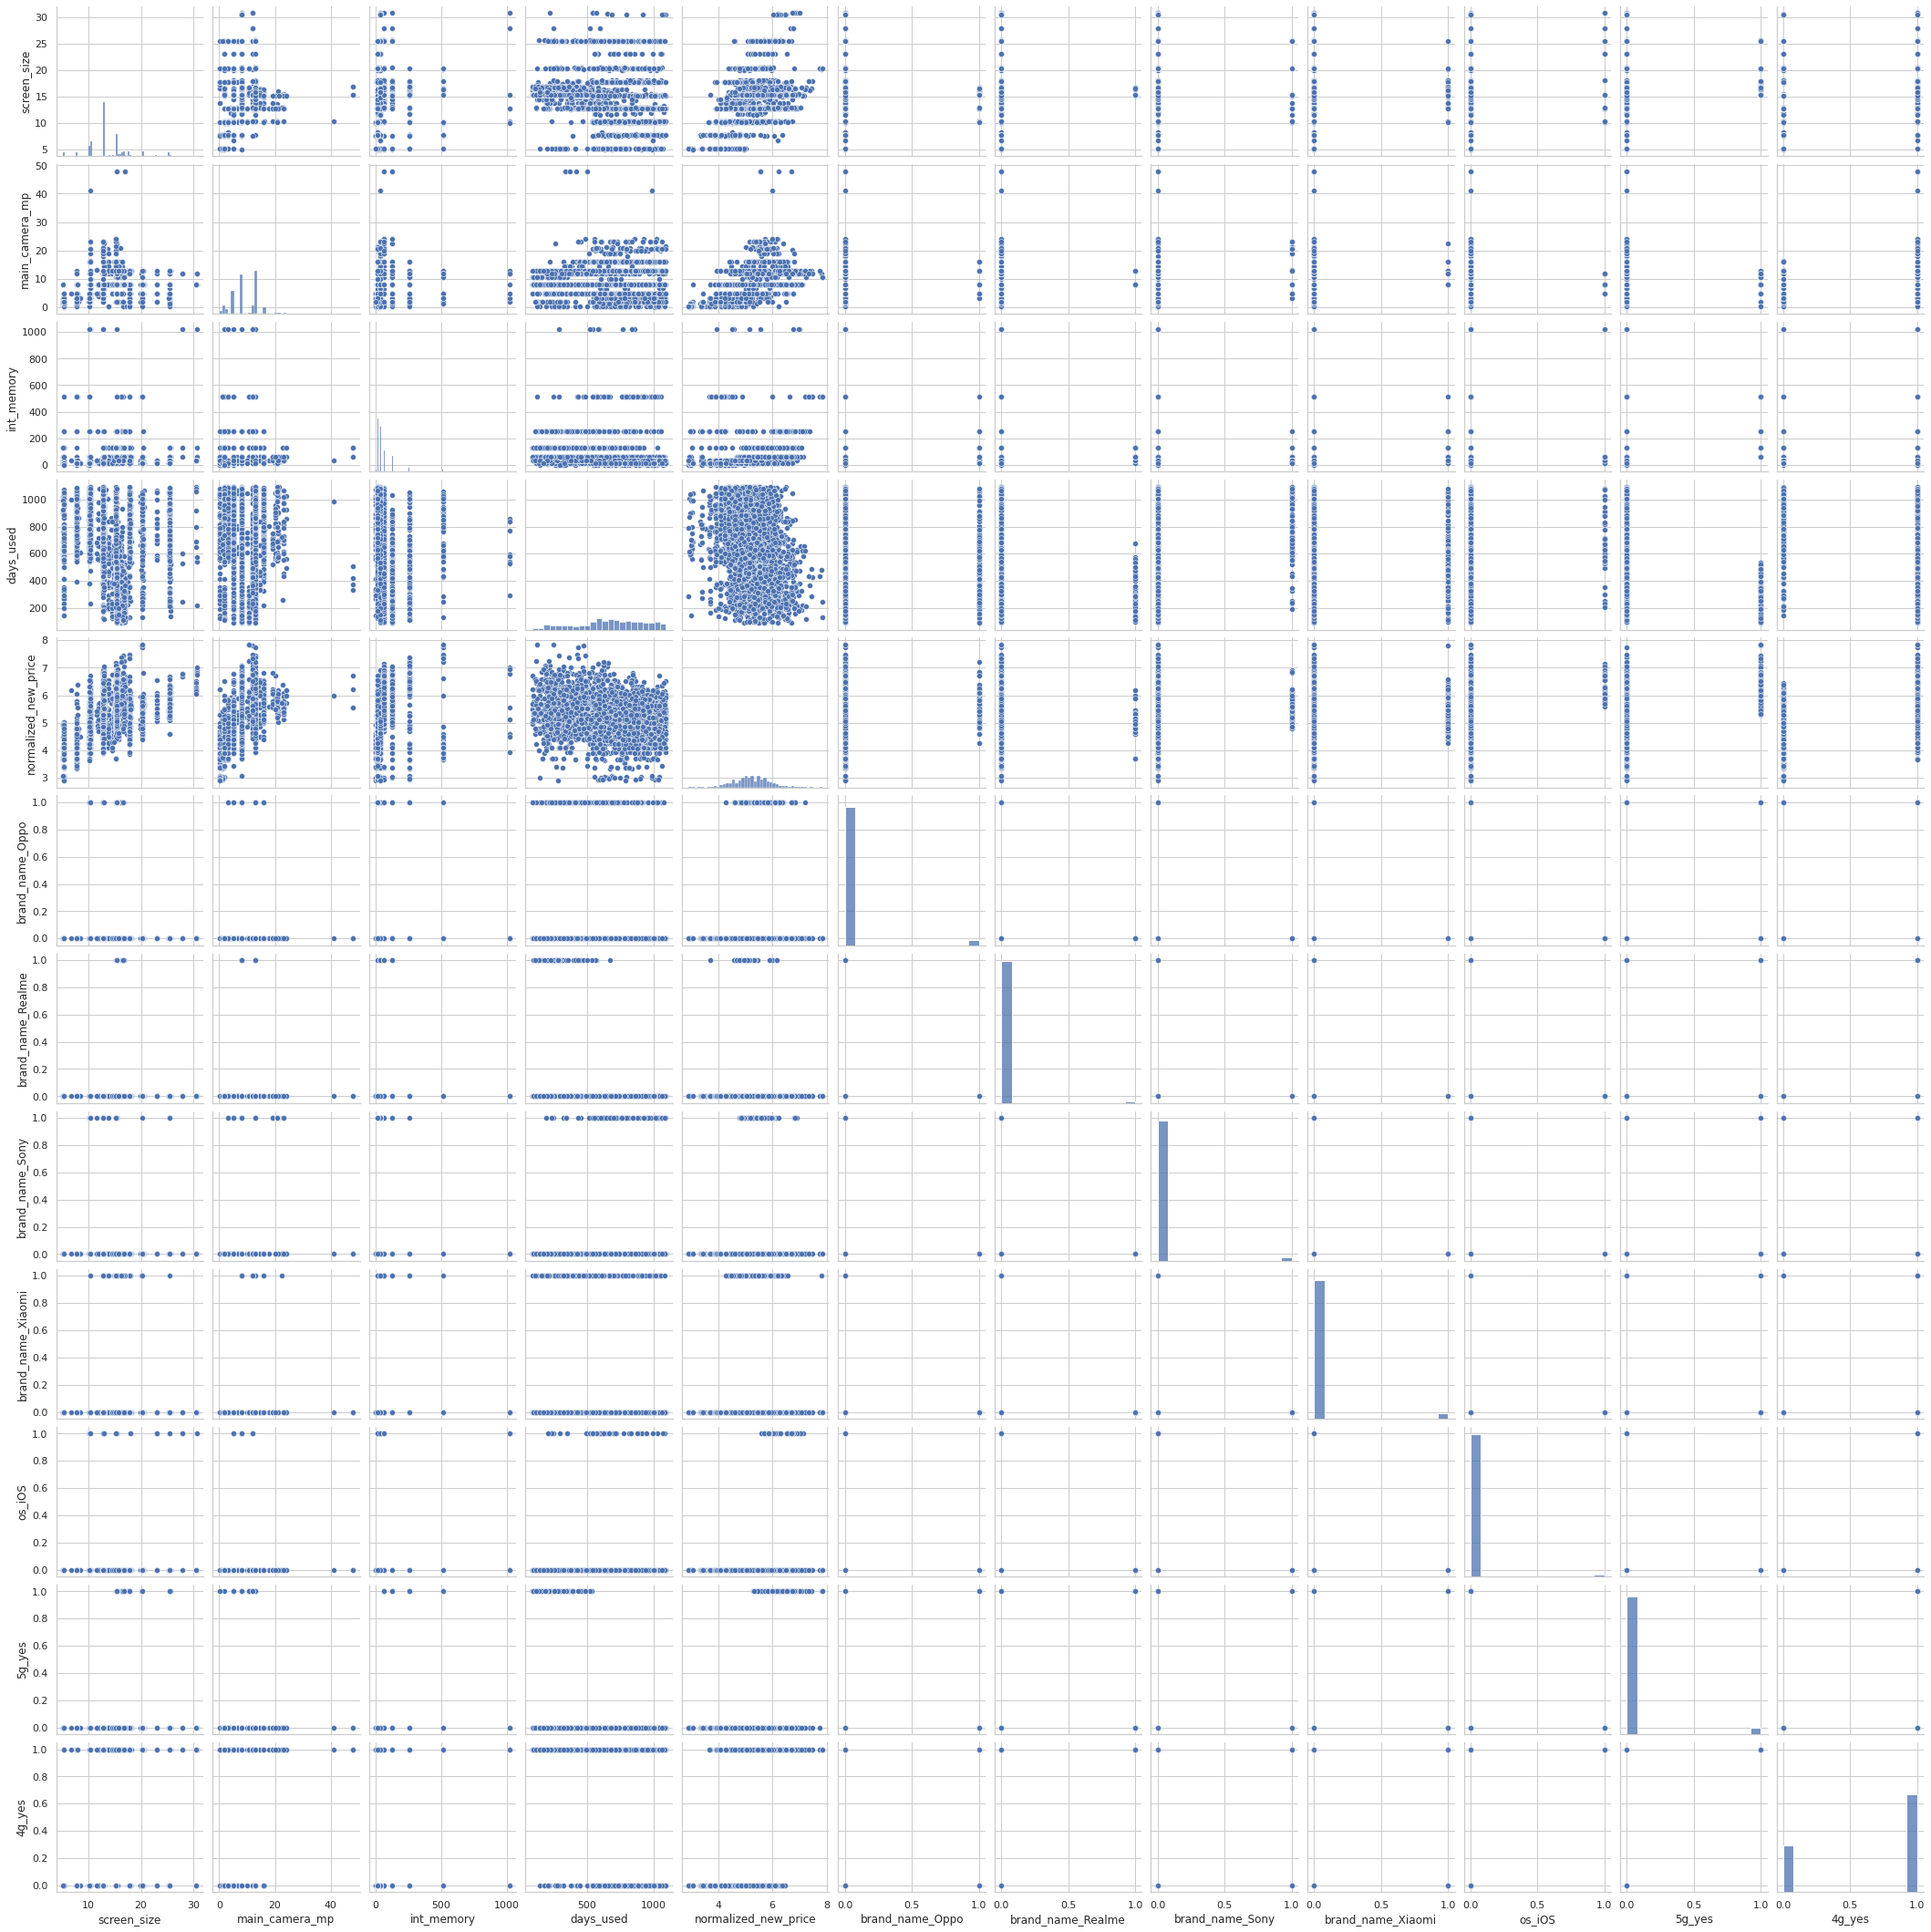

<IPython.core.display.Javascript object>

In [ ]:
sns.pairplot(df[["screen_size", "main_camera_mp", "int_memory", "days_used", "normalized_new_price", "brand_name_Oppo", 
                 "brand_name_Realme", "brand_name_Sony", "brand_name_Xiaomi", "os_iOS", "5g_yes", "4g_yes"]])
plt.show()

There don't seem to be any pronounced nonlinear relationships among variables, so I will continue on without transforming any variables. I will consider this a pass for the test of linearity and independence, given the lack of apparent pattern and random distribution of points.

### Test for Normality

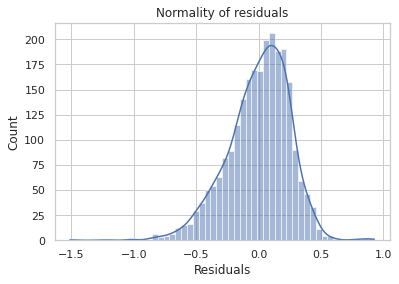

<IPython.core.display.Javascript object>

In [ ]:
# Plotting the residuals to see if they have a normal distribution
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

Residual terms seem pretty normally distributed.

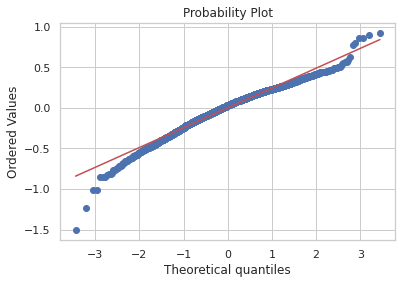

<IPython.core.display.Javascript object>

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Most of the points are lying on a straight line in the QQ plot, so things are looking good.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9763654470443726, pvalue=1.381204473349966e-19)

<IPython.core.display.Javascript object>

The p-value < 0.05, so the residuals are not normal, but this distribution is definitely close to being normal. This is a pass for normality!

### Test for Homoscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train14)
lzip(name, test)

[('F statistic', 1.0658741129677938), ('p-value', 0.13510463103218615)]

<IPython.core.display.Javascript object>

The p-value is > 0.05, so the residuals are homoscedastic!

## Final Model

In [ ]:
print(olsmod_16.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.821
Model:                               OLS   Adj. R-squared:                  0.820
Method:                    Least Squares   F-statistic:                     916.4
Date:                   Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                           04:59:06   Log-Likelihood:                -51.918
No. Observations:                   2417   AIC:                             129.8
Df Residuals:                       2404   BIC:                             205.1
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

* R-squared is 0.821 and adjusted R-squared is 0.820, which means the model is able to explain approximately 82% of the variance in the data. Given the rising p-value of brand_name_Realme, it's likely that this parameter could be dropped, as well, but it doesn't quite meet the 0.05 threshold for dropping, so I left it in.
* Most notably are the coefficients for normalized_new_price, brand_name_Xiaomi, os_iOS, 5g_yes, and 4g_yes.
* A unit increase in the normalized_new_price will increase the normalized_used_price by 0.4544 units.
* A unit increase in the brand_name_Xiaomi will increase the normalized_used_price by 0.1255 units.
* A unit increase in the os_iOS will decrease the normalized_used_price by 0.1075 units.
* A unit increase in the 5g_yes will increase the normalized_used_price by 0.1156 units.
* A unit increase in the 4g_yes will increase the normalized_used_price by 0.1001 units.

In [ ]:
olsmod_16.params

const                   1.187437
screen_size             0.044660
main_camera_mp          0.022883
int_memory              0.000251
days_used              -0.000174
normalized_new_price    0.454377
brand_name_Oppo         0.084174
brand_name_Realme       0.096542
brand_name_Sony        -0.083575
brand_name_Xiaomi       0.125469
os_iOS                 -0.107524
5g_yes                  0.115628
4g_yes                  0.100087
dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
# Full equation, according to parameters set forth above
Equation = "Price ="
print(Equation, end=" ")
for i in range(len(x_train14.columns)):
  if i == 0:
    print(olsmod_16.params[i], "+", end=" ")
  elif i != len(x_train14.columns) - 1:
    print("(", olsmod_16.params[i], ")*(", x_train14.columns[i], ")", "+", end=" ",)
  else:
    print("(", olsmod_16.params[i], ")*(", x_train14.columns[i], ")")

Price = 1.1874366369860003 + ( 0.04466001905079359 )*( screen_size ) + ( 0.02288326763150511 )*( main_camera_mp ) + ( 0.00025089825695988663 )*( int_memory ) + ( -0.0001738903404453662 )*( days_used ) + ( 0.4543767668968605 )*( normalized_new_price ) + ( 0.08417395531646654 )*( brand_name_Oppo ) + ( 0.09654207272251021 )*( brand_name_Realme ) + ( -0.08357467857301389 )*( brand_name_Sony ) + ( 0.1254693681847409 )*( brand_name_Xiaomi ) + ( -0.10752351985863515 )*( os_iOS ) + ( 0.11562756647660082 )*( 5g_yes ) + ( 0.10008662926885718 )*( 4g_yes )


<IPython.core.display.Javascript object>

In [ ]:
# Checking what columns are left in training set to change testing set
x_train14.columns

Index(['const', 'screen_size', 'main_camera_mp', 'int_memory', 'days_used',
       'normalized_new_price', 'brand_name_Oppo', 'brand_name_Realme',
       'brand_name_Sony', 'brand_name_Xiaomi', 'os_iOS', '5g_yes', '4g_yes'],
      dtype='object')

<IPython.core.display.Javascript object>

In [ ]:
x_test.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_new_price', 'brand_name_Alcatel', 'brand_name_Apple',
       'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon',
       'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google',
       'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei',
       'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_LG',
       'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu',
       'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola',
       'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo',
       'brand_name_Others', 'brand_name_Panasonic', 'brand_name_Realme',
       'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice',
       'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi',
       'brand_name_ZTE', 'os_Others', 'os_Windows', 'os_iOS', '5g_yes',
       '4g_y

<IPython.core.display.Javascript object>

In [ ]:
# Dropping columns no longer in training data from the testing set
# Have to add columns dropped through multicollinearity eliminations
allcols_to_drop = ["brand_name_Apple", "brand_name_Others", "weight", "release_year", "battery", 
                   "selfie_camera_mp", "ram", "brand_name_Alcatel", "brand_name_Asus", "brand_name_BlackBerry", "brand_name_Celkon", 
                "brand_name_Coolpad", "brand_name_Gionee", "brand_name_Google", "brand_name_HTC", 
                "brand_name_Honor", "brand_name_Huawei", "brand_name_Infinix", "brand_name_Karbonn", 
                "brand_name_LG", "brand_name_Lava", "brand_name_Lenovo", "brand_name_Meizu", 
                "brand_name_Micromax", "brand_name_Microsoft", "brand_name_Motorola", "brand_name_Nokia", 
                "brand_name_OnePlus", "brand_name_Panasonic", "brand_name_Samsung", "brand_name_Spice", 
                "brand_name_Vivo", "brand_name_XOLO", "brand_name_ZTE", "os_Others", "os_Windows"]
x_test2 = x_test.drop(allcols_to_drop, axis=1)
x_test2.columns

Index(['const', 'screen_size', 'main_camera_mp', 'int_memory', 'days_used',
       'normalized_new_price', 'brand_name_Oppo', 'brand_name_Realme',
       'brand_name_Sony', 'brand_name_Xiaomi', 'os_iOS', '5g_yes', '4g_yes'],
      dtype='object')

<IPython.core.display.Javascript object>

In [ ]:
# Finally time to make predictions!
y_pred = olsmod_16.predict(x_test2)

<IPython.core.display.Javascript object>

In [ ]:
# Checking RMSE on the training data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

0.24722461354252168

<IPython.core.display.Javascript object>

In [ ]:
# Checking RMSE on the testing data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.25273134747296583

<IPython.core.display.Javascript object>

RMSE on the train and test sets are SUPER close!! The model isn't suffering from overfitting, and I can finally breathe a full breath again!

In [ ]:
# Checking MAE on the training data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

0.1937662592221425

<IPython.core.display.Javascript object>

In [ ]:
# Checking MAE on the testing data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.19609802892874933

<IPython.core.display.Javascript object>

MAE indicates that my model can predict the normalized_used_price within a mean error of 0.19 units on the test data! This is the best news I've had all month, by a long shot!

## Actionable Insights and Recommendations 

In [ ]:
olsmod_16.params

const                   1.187437
screen_size             0.044660
main_camera_mp          0.022883
int_memory              0.000251
days_used              -0.000174
normalized_new_price    0.454377
brand_name_Oppo         0.084174
brand_name_Realme       0.096542
brand_name_Sony        -0.083575
brand_name_Xiaomi       0.125469
os_iOS                 -0.107524
5g_yes                  0.115628
4g_yes                  0.100087
dtype: float64

<IPython.core.display.Javascript object>

* According to the model created, the strongest predictors of the normalized used price are screen size, main camera quality, internal memory, the number of days the device has been used, the normalized new price, whether the brand is from Oppo, Realme, Sony, or Xiaomi, if the device uses iOS, whether the device has 5g, and whether the device has 4g.
* The strongest factors in the model are normalized new price, whether the brand is Xiaomi, if the OS is iOS, if the device has 5g, and if the device has 4g.
* A unit increase in the normalized_new_price will increase the normalized_used_price by 0.4544 units.
* A unit increase in the brand_name_Xiaomi will increase the normalized_used_price by 0.1255 units.
* A unit increase in the os_iOS will decrease the normalized_used_price by 0.1075 units.
* A unit increase in the 5g_yes will increase the normalized_used_price by 0.1156 units.
* A unit increase in the 4g_yes will increase the normalized_used_price by 0.1001 units.

My recommendations are to monitor the stronger factors listed above and to acquire devices which: 
* have a higher price when sold new,
* are from the brand Xiaomi,
* are iOS devices,
* are capable of 4g, 5g, or (preferably) both.
This will ensure that the used price for the device will be higher when sold by ReCell.

___